In [1]:
import polars as pl
import plotnine as pn

In [2]:
#This code expands the default plot size:
pn.options.figure_size = (6, 4)

#### Load example data

In [3]:
mexico_hc_spending = pl.read_csv("https://github.com/yardsale8/DSCI_210_R_notebooks/raw/main/data/Mexico_Health_Spending.csv")

mexico_hc_spending.head()

shape: (5, 3)
┌──────┬────────────┬─────────────────────────────────┐
│ Year ┆ Type       ┆ Spending (in billions, 2017 Pu… │
│ ---  ┆ ---        ┆ ---                             │
│ i64  ┆ str        ┆ f64                             │
╞══════╪════════════╪═════════════════════════════════╡
│ 1995 ┆ Government ┆ 25.1                            │
│ 1996 ┆ Government ┆ 25.7                            │
│ 1997 ┆ Government ┆ 28.4                            │
│ 1998 ┆ Government ┆ 31.2                            │
│ 1999 ┆ Government ┆ 34.4                            │
└──────┴────────────┴─────────────────────────────────┘

### Yuck!  Let's clean up the spending column name!

#### Step 1 - Use `columns` to identify the current name.

Use `columns` to see the column names, then copy-and-paste to grab the name from the output.

In [4]:
mexico_hc_spending.columns

['Year',
 'Type',
 'Spending (in billions, 2017 Purchasing Power Parity Dollars PPP $)']

#### Step 2 - Use `rename` to clean up the name.

**Syntax.**

```{Python}
...
.rename({"old_name1":"new_name1",
         "old_name2":"new_name2",
           ...
        })
...
```

In [5]:
mexico_hc_spending = (mexico_hc_spending
                      .rename({'Spending (in billions, 2017 Purchasing Power Parity Dollars PPP $)':'Spending'})
                     )

mexico_hc_spending.head()

shape: (5, 3)
┌──────┬────────────┬──────────┐
│ Year ┆ Type       ┆ Spending │
│ ---  ┆ ---        ┆ ---      │
│ i64  ┆ str        ┆ f64      │
╞══════╪════════════╪══════════╡
│ 1995 ┆ Government ┆ 25.1     │
│ 1996 ┆ Government ┆ 25.7     │
│ 1997 ┆ Government ┆ 28.4     │
│ 1998 ┆ Government ┆ 31.2     │
│ 1999 ┆ Government ┆ 34.4     │
└──────┴────────────┴──────────┘

# Introduction to `plotnine`

In this notebook, we will
1. Review the grammar of graphics and graphical specifications,
2. Show how the graphical specification can be implemented in `ggplot`, and
3. Show how some modifiers are implemented in `ggplot`.

## Topic 1 - Review of the grammar of graphics and graphical specifications

### What is a data visualization?

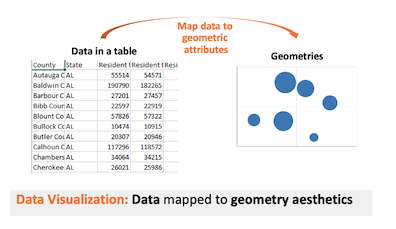

### Describing a visualization via a graphical specification

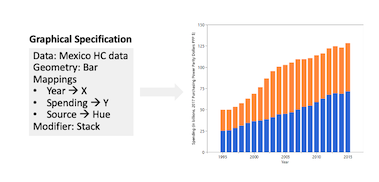

### Three more graphical specifications

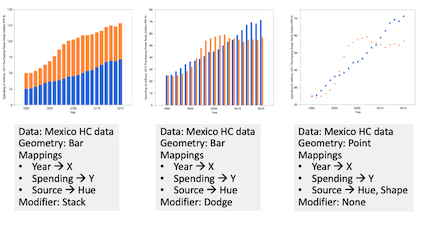

## Topic 2 - Implementing a graphical specification with `ggplot`

The `R` library `ggplot` (part of `tidyverse`)

1. Implements the Grammar of Graphics [i.e., the `"gg"` in `ggplot`], and
2. Easily maps to our graphical specifications.

### Comparing a graphical specification to `ggplot` code
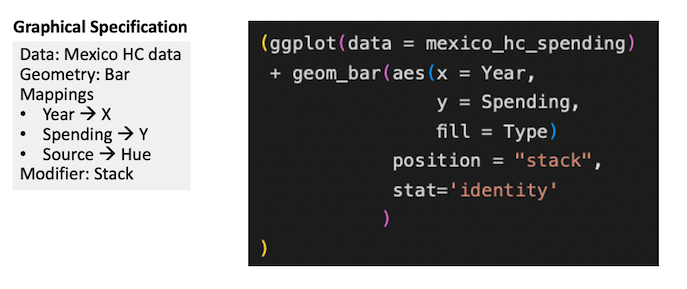

### How `ggplot` code relates to the graphical specification
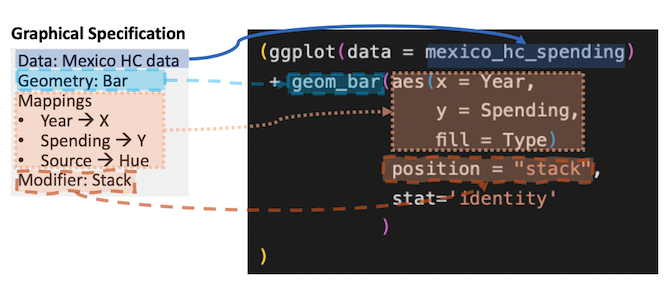

## Topic 3 - Converting `ggplot` code to `plotnine` code.

### Convert `ggplot` code to `plotnine` - Aliased import

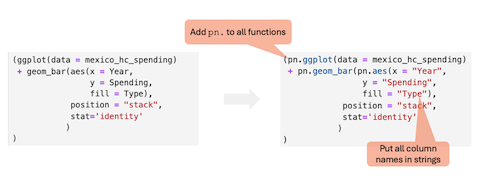

In [6]:
import plotnine as pn #Only once at the top of notebook

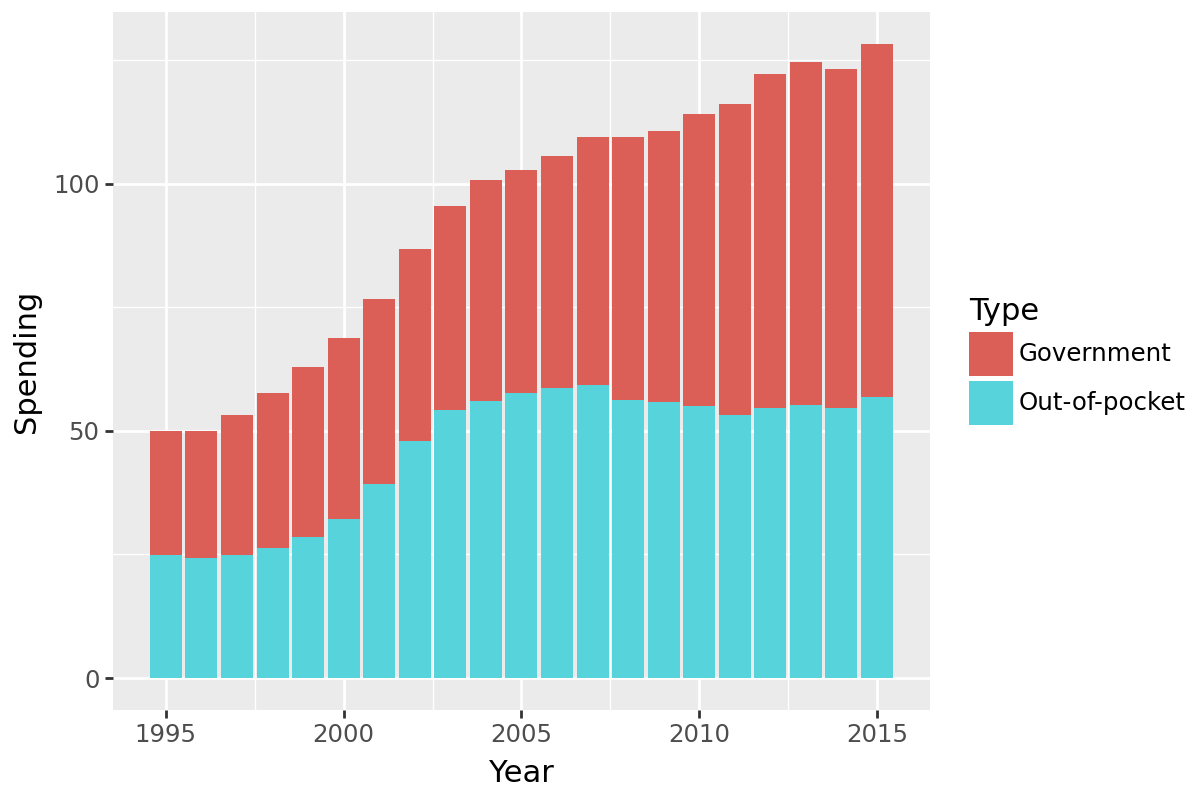

In [7]:
(pn.ggplot(data = mexico_hc_spending)
 + pn.geom_bar(pn.aes(x = "Year",                    # Use `aes` to define mappings as first argument
                y = "Spending",
                fill = "Type"),
            position = "stack",
            stat='identity'                 # Use this when mapping a value to y
           )
)

### Converting `ggplot` code to `plotnine` - Import using `from ... import ...` statement

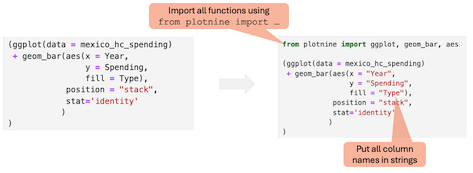

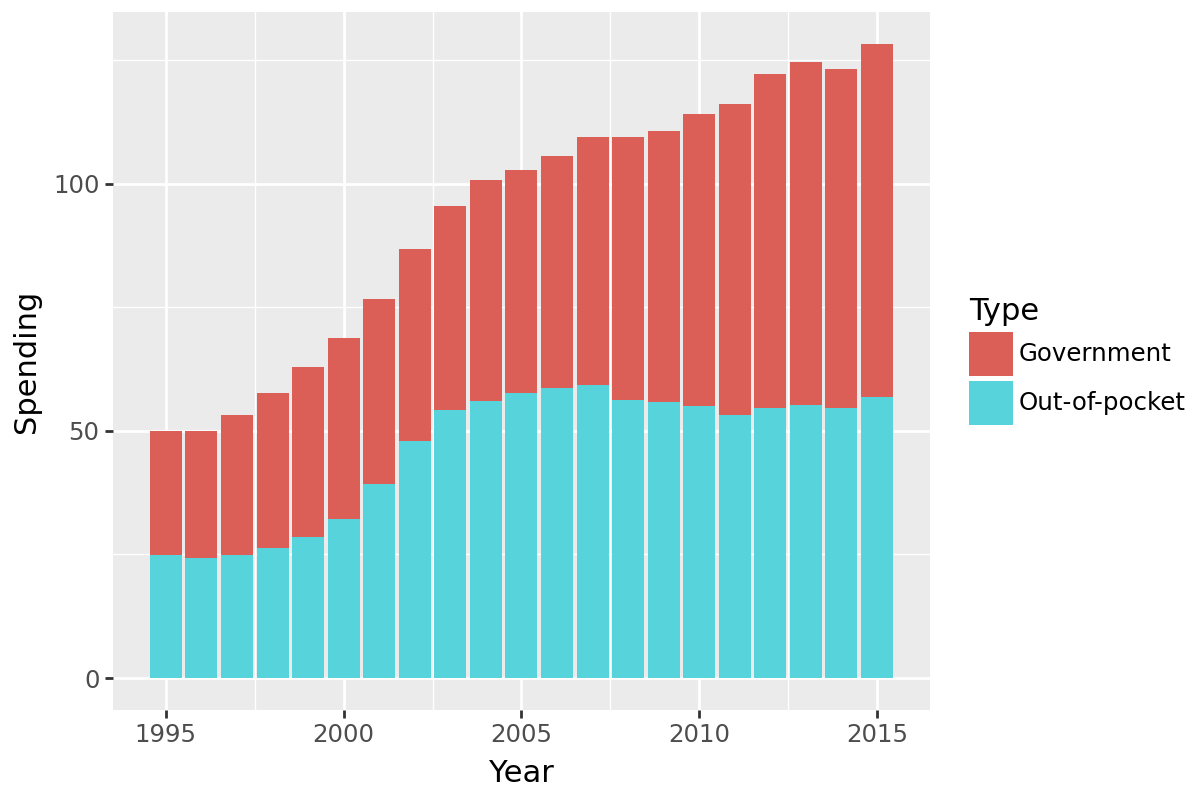

In [8]:
from plotnine import ggplot, geom_bar, aes # Might need to do this every time :(

(ggplot(data = mexico_hc_spending)
 + geom_bar(aes(x = "Year",                    # Use `aes` to define mappings as first argument
                y = "Spending",
                fill = "Type"),
            position = "stack",
            stat='identity'                 # Use this when mapping a value to y
           )
)

## <font color="red"> Exercise 2.1.1 </font>

Convert the following `ggplot` code to `plotnine` code that works with 

1. the `import plotnine as pn` import statement, and
2. The `from ... import ...` statement.

**Original `ggplot` code.**
```{R}
(ggplot(data = mexico_hc_spending)
 + geom_line(aes(x = Year,
                 y = Spending,
                 color = Type))
 + geom_point(aes(x = Year,
                  y = Spending,
                  color = Type))
)
```

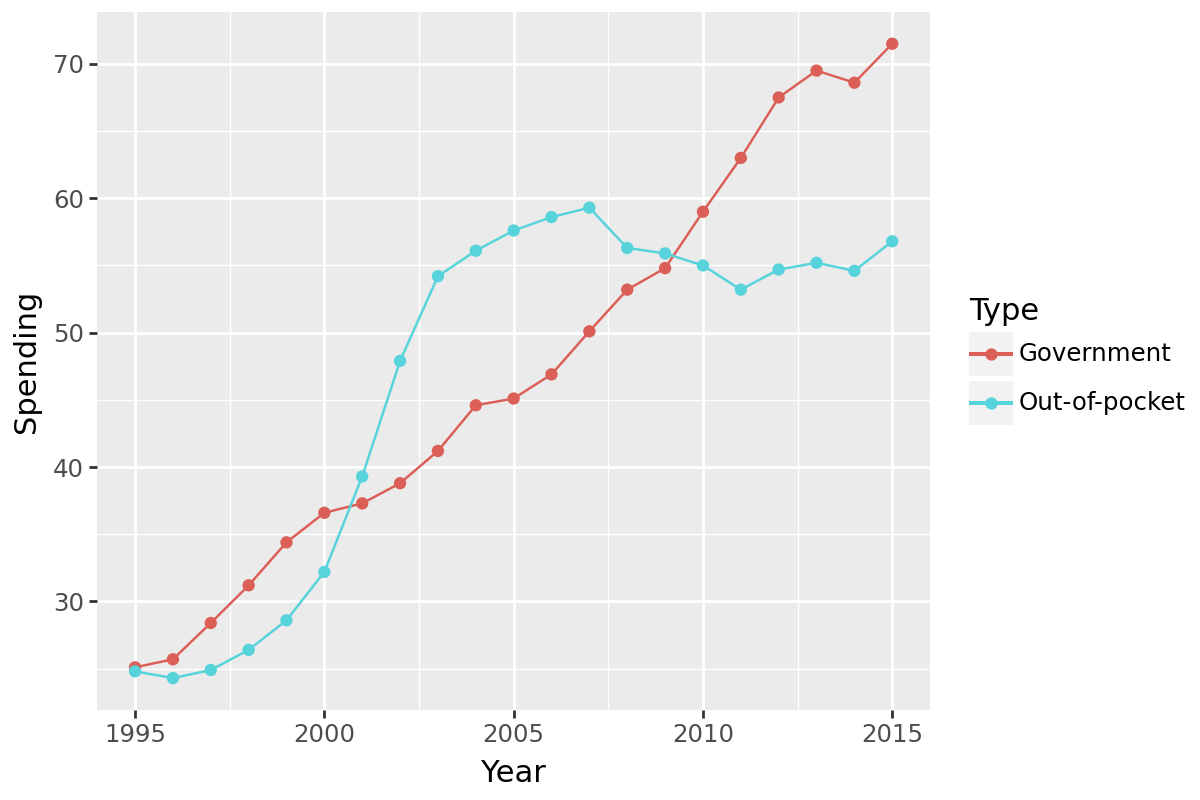

In [14]:
import plotnine as pn

(pn.ggplot(data = mexico_hc_spending)
 + pn.geom_line(aes(x = 'Year',
                 y = 'Spending',
                 color = 'Type'))
 + pn.geom_point(aes(x = 'Year',
                  y = 'Spending',
                  color = 'Type'))
)

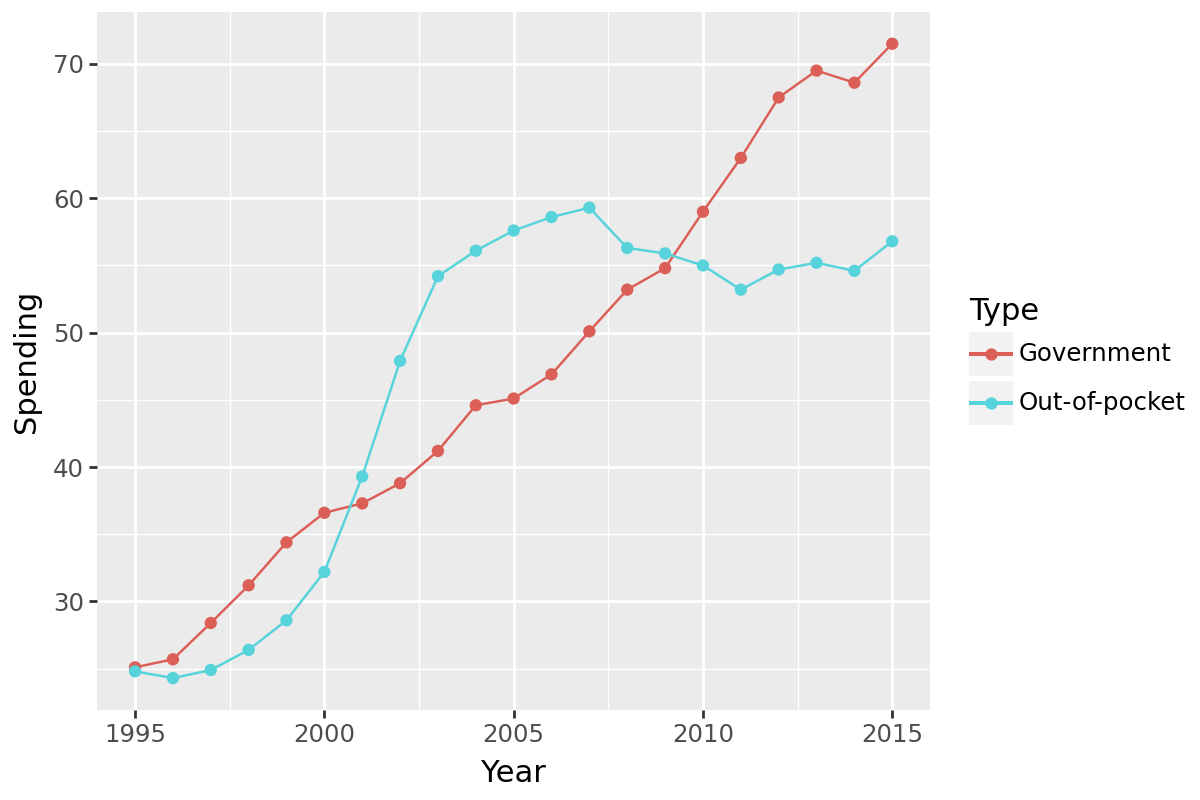

In [17]:
from plotnine import ggplot, geom_line, geom_point, aes

(ggplot(data = mexico_hc_spending)
 + geom_line(aes(x = 'Year',
                 y = 'Spending',
                 color = 'Type'))
 + geom_point(aes(x = 'Year',
                  y = 'Spending',
                  color = 'Type'))
)

## <font color="red"> Exercise 2.1.2 </font>

Consider the following plot.

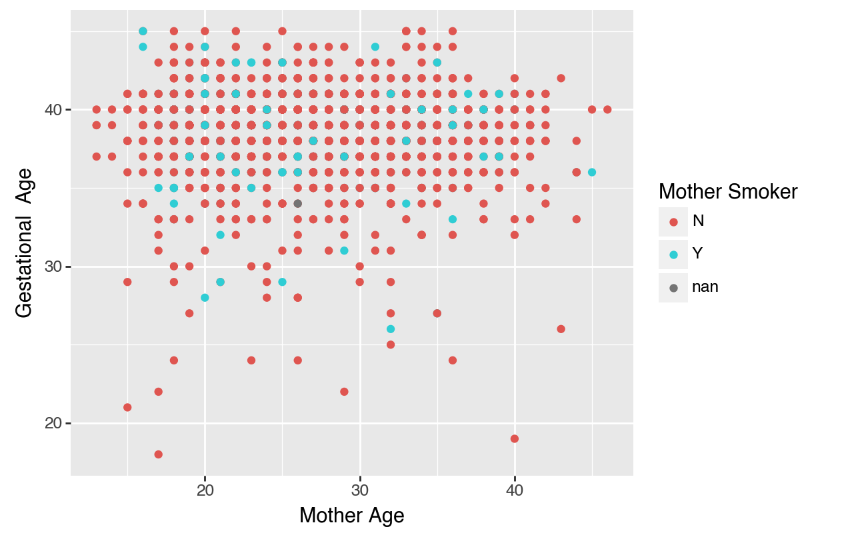

**Tasks.** 

1. Define the graphical specification [Replace all `??` and `...`], and
2. Implement the plot using `plotnine`.

**Graphical Specification.**

<font color="orange">
- <b>Data:</b> births <br>
- <b>Geometry:</b> point <br>
- <b>Mappings:</b> <br>
        * x ⟶ Mother Age <br>
        * y ⟶ Gestational Age <br>
    ...
- <b>Modifiers:</b> <br>
        * Color ⟶ Mother Smoker <br>
        * ?? ⟶ ?? <br>
    ...
</font>

In [24]:
births = pl.read_csv('https://github.com/yardsale8/DSCI_210_R_notebooks/raw/main/data/NC_Birth.csv', null_values=['.'])

births.head()

shape: (5, 23)
┌──────────┬────────┬─────────────────┬──────────┬───┬─────────┬───────┬─────────────────┬─────────┐
│ Father   ┆ Father ┆ Father Years of ┆ Mother   ┆ … ┆ Birth   ┆ Low   ┆ Apgar Score -   ┆ Apgar   │
│ Minority ┆ Age    ┆ Education       ┆ Minority ┆   ┆ Weight  ┆ Birth ┆ One Minute      ┆ Score - │
│ ---      ┆ ---    ┆ ---             ┆ ---      ┆   ┆ (Grams) ┆ ---   ┆ ---             ┆ Five    │
│ str      ┆ i64    ┆ i64             ┆ str      ┆   ┆ ---     ┆ str   ┆ i64             ┆ Minutes │
│          ┆        ┆                 ┆          ┆   ┆ i64     ┆       ┆                 ┆ ---     │
│          ┆        ┆                 ┆          ┆   ┆         ┆       ┆                 ┆ i64     │
╞══════════╪════════╪═════════════════╪══════════╪═══╪═════════╪═══════╪═════════════════╪═════════╡
│ Nonwhite ┆ 50     ┆ 12              ┆ White    ┆ … ┆ 2866    ┆ N     ┆ 9               ┆ 9       │
│ White    ┆ 19     ┆ 9               ┆ White    ┆ … ┆ 3121    ┆ N     ┆ 8               ┆ 9       │
│ White    ┆ 37     ┆ 17              ┆ White    ┆ … ┆ 2667    ┆ N     ┆ 8               ┆ 9       │
│ null     ┆ null   ┆ null            ┆ Nonwhite ┆ … ┆ 2696    ┆ N     ┆ 8               ┆ 9       │
│ Nonwhite ┆ 39     ┆ 11              ┆ Nonwhite ┆ … ┆ 2979    ┆ N     ┆ 4               ┆ 9       │
└──────────┴────────┴─────────────────┴──────────┴───┴─────────┴───────┴─────────────────┴─────────┘

In [36]:
from plotnine import ggplot, geom_point, aes

(ggplot(data = births)
 + geom_point(aes(x = 'Mother Age',
                 y = 'Gestational Age',
                 color = 'Mother Smoker'))
)

PlotnineError: "Could not evaluate the 'y' mapping: 'Gestational Age' (original error: invalid syntax (<string-expression>, line 1))"

C:\Users\gt7194iu\AppData\Local\anaconda3\envs\polars\Lib\site-packages\IPython\lib\pretty.py:787: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


PlotnineError: "Could not evaluate the 'y' mapping: 'Gestational Age' (original error: invalid syntax (<string-expression>, line 1))"

## Topic 4 - Additional topics

Finally, we will discuss some additional topics that will allow you to take your plots to the next level.

1. Layer multiple geometries on the same plot.
2. Adding facets to plots with `facet_grid`
3. Preprocessing the data.
3. Creating small multiples using `facet_wrap`
4. Plotting an aggregation.



## Topic 4.1 - Layering multiple geometries on the same plot

As with `ggplot`, `plotnine` paints each geometry in order, allowing us to determine which geometries will end up on top.

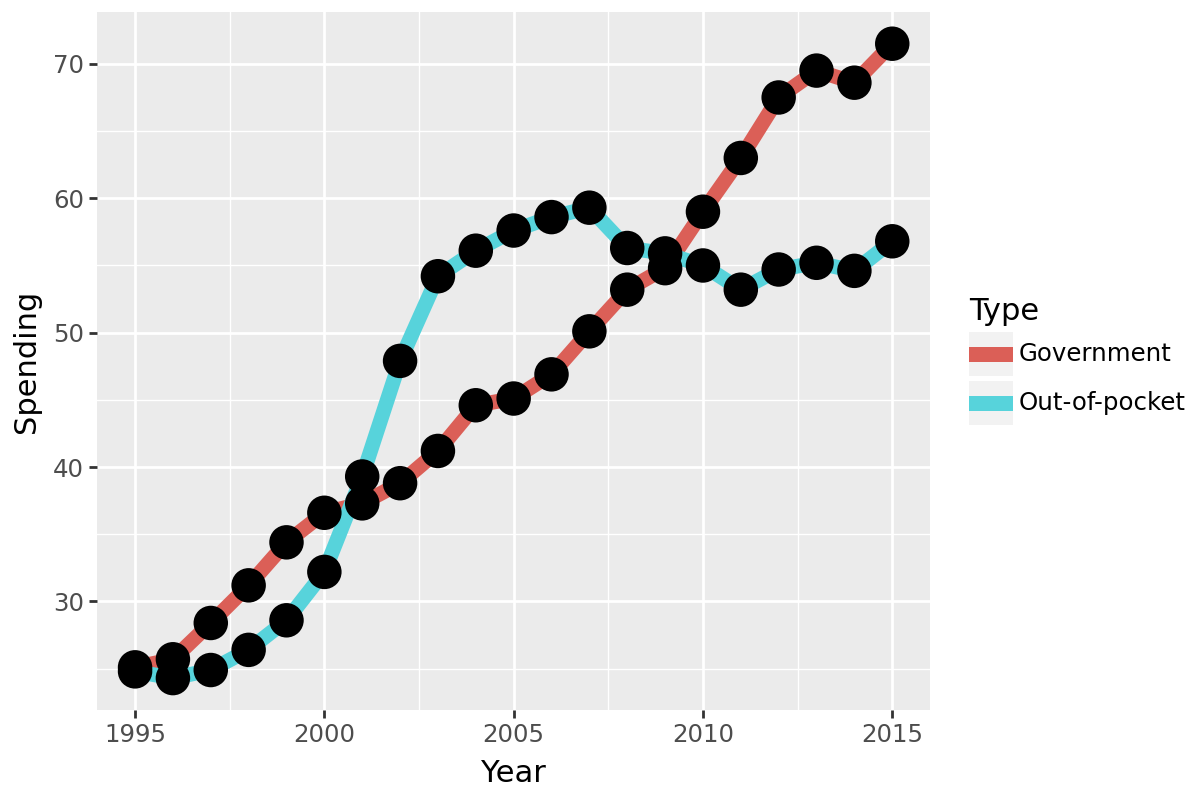

In [37]:
from plotnine import ggplot, geom_line, geom_point, aes


# Line first, then points
(ggplot(data = mexico_hc_spending)
 + geom_line(aes(x = "Year",
                 y = "Spending",
                 color = "Type"),
                 size = 3)
 + geom_point(aes(x = "Year",
                  y = "Spending"),
                  color = "black",
                  size = 6)
)

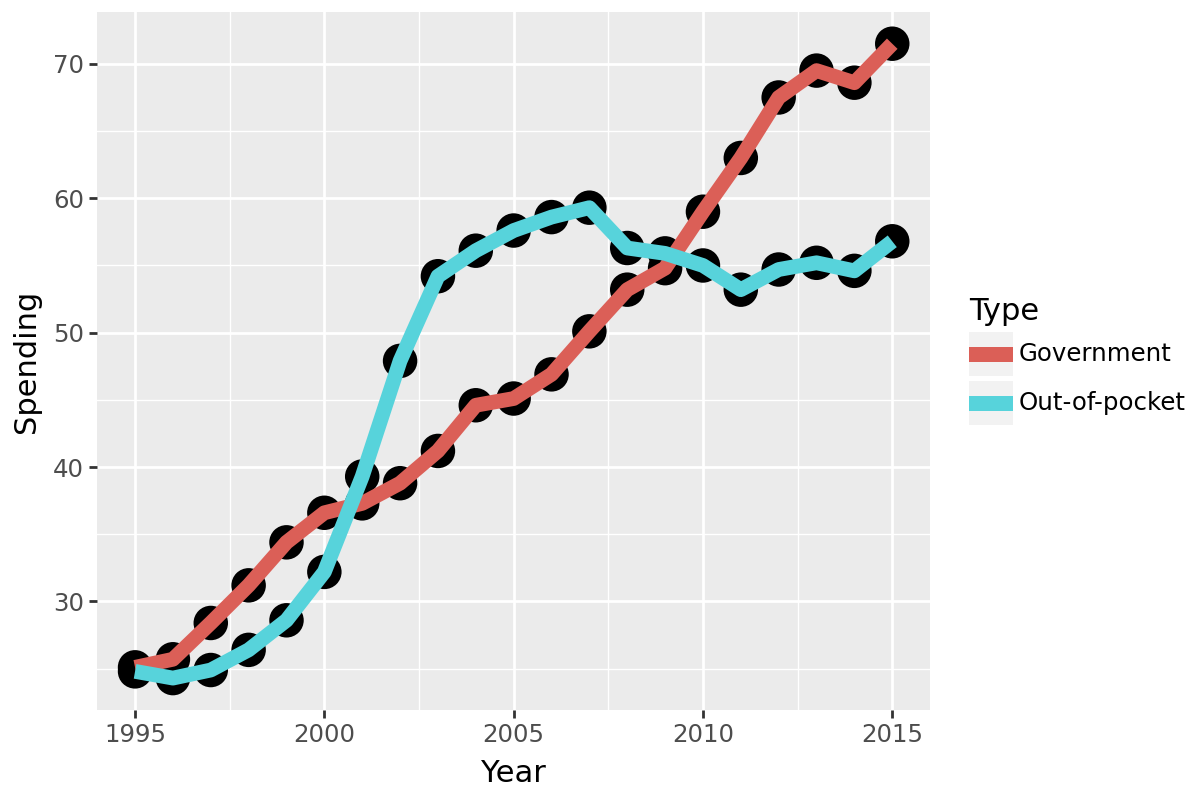

In [38]:
from plotnine import ggplot, geom_line, geom_point, aes


# Points first, then lines
(ggplot(data = mexico_hc_spending)
 + geom_point(aes(x = "Year",
                  y = "Spending"),
                  color = "black",
                  size = 6)
 + geom_line(aes(x = "Year",
                 y = "Spending",
                 color = "Type"),
                 size = 3)
)

## <font color="red"> Exercise 2.1.3 </font>

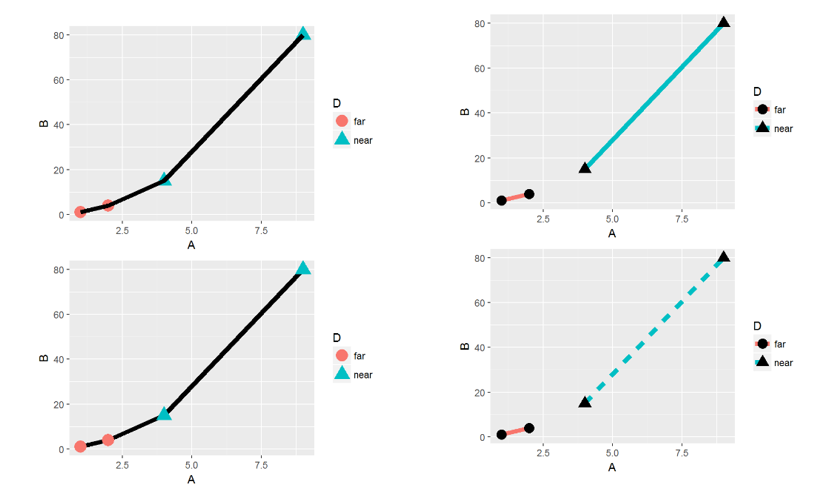

**Task.** Create each of the graphs shown above.

In [41]:
toy_data = pl.DataFrame({"A" : (2,1,4,9),
                         "B" : (4,1,15,80),
                         "C" : (1,2,3,4),
                         "D" : ('far','far','near','near')})
toy_data

shape: (4, 4)
┌─────┬─────┬─────┬──────┐
│ A   ┆ B   ┆ C   ┆ D    │
│ --- ┆ --- ┆ --- ┆ ---  │
│ i64 ┆ i64 ┆ i64 ┆ str  │
╞═════╪═════╪═════╪══════╡
│ 2   ┆ 4   ┆ 1   ┆ far  │
│ 1   ┆ 1   ┆ 2   ┆ far  │
│ 4   ┆ 15  ┆ 3   ┆ near │
│ 9   ┆ 80  ┆ 4   ┆ near │
└─────┴─────┴─────┴──────┘

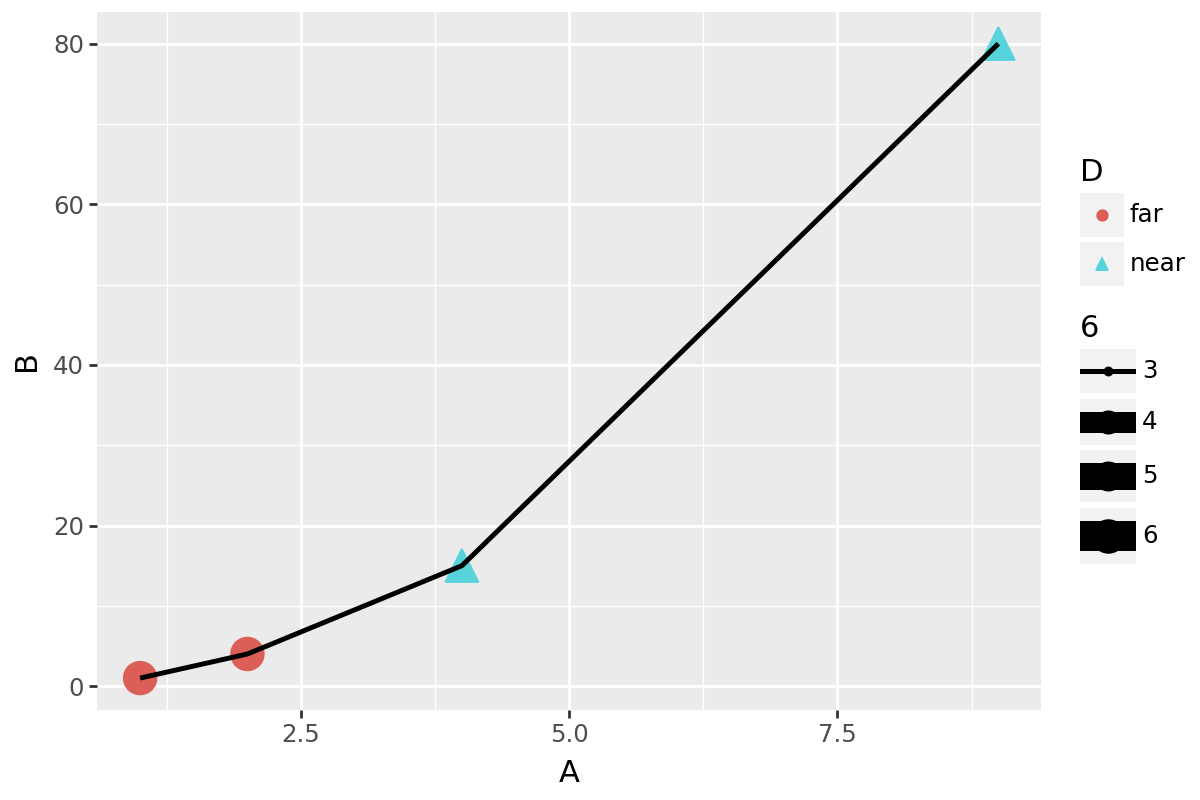

In [80]:
from plotnine import ggplot, geom_line, geom_point, aes

(ggplot(data = toy_data)
 + geom_point(aes(x = 'A', 
                  y = 'B', 
                  color = 'D',
                  shape = 'D',
                  size = 6))
 + geom_line(aes(x = 'A', 
                 y = 'B',
                 size = 3))
)

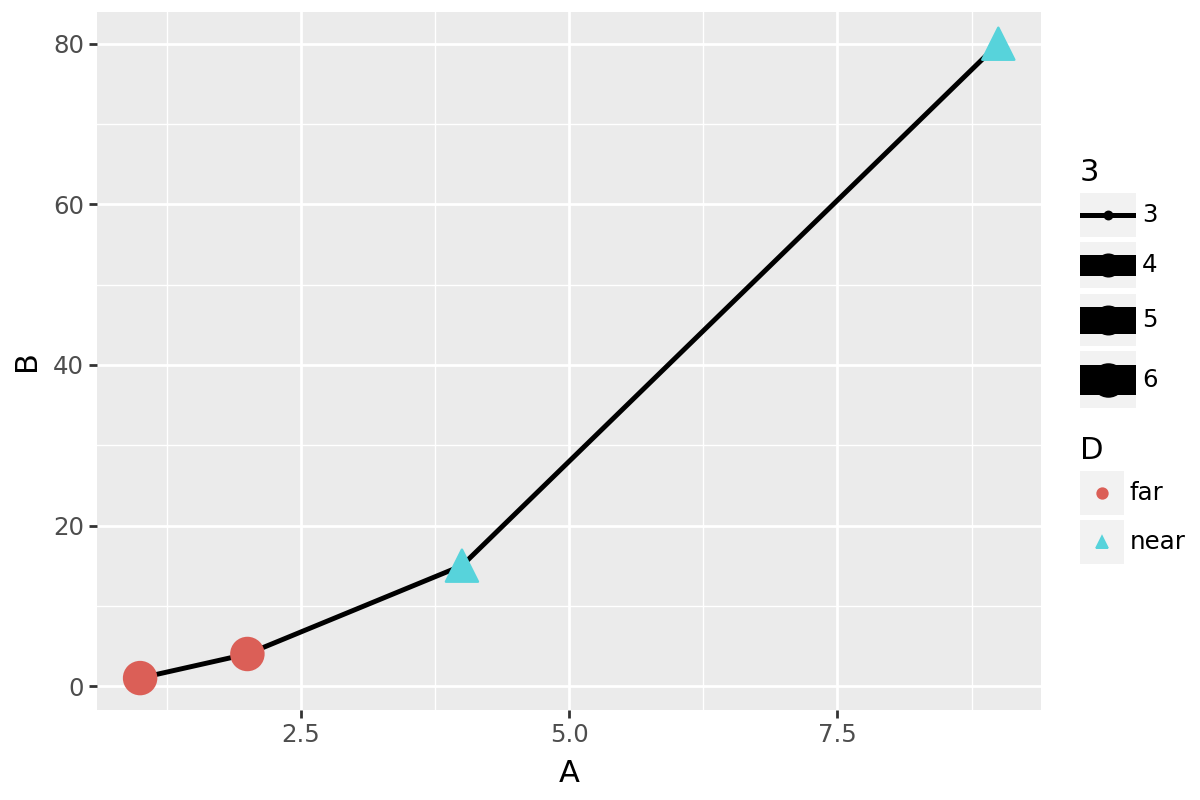

In [84]:
from plotnine import ggplot, geom_line, geom_point, aes

(ggplot(data = toy_data)
 + geom_line(aes(x = 'A', 
                 y = 'B',
                 size = 3))
 + geom_point(aes(x = 'A', 
                  y = 'B', 
                  color = 'D',
                  shape = 'D',
                  size = 6))
)

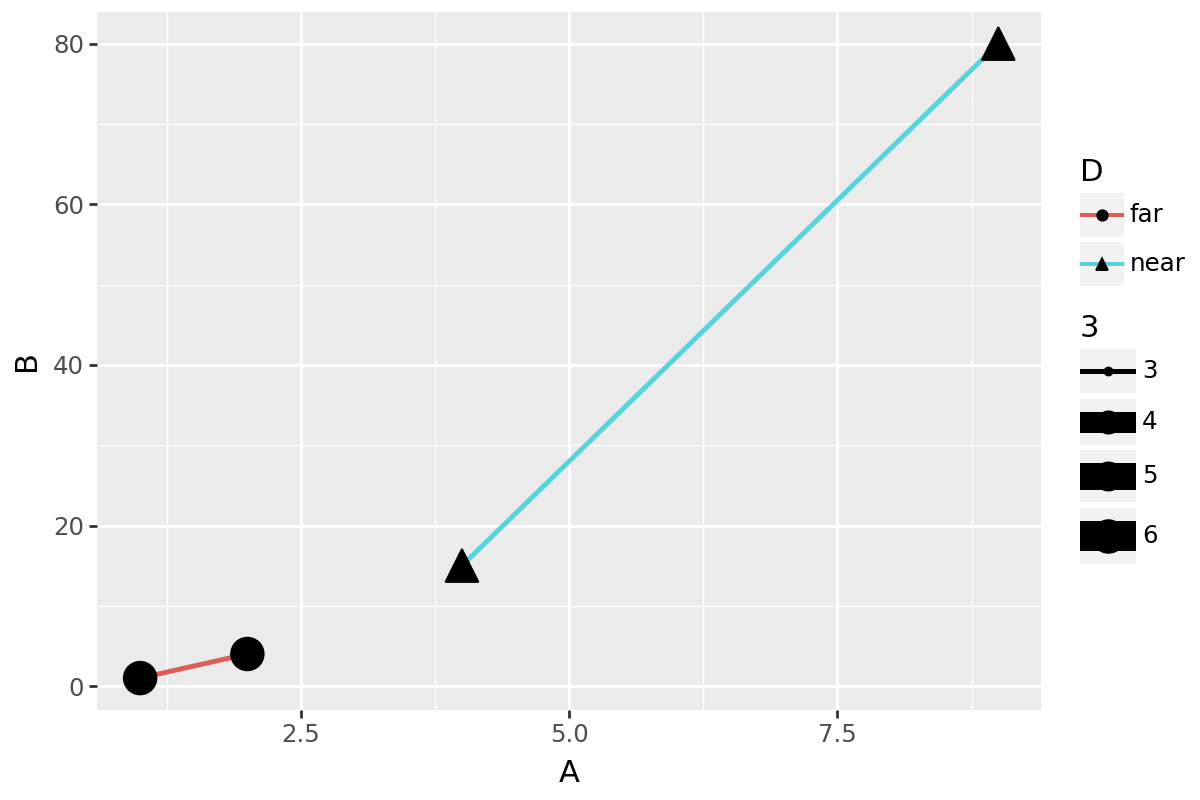

In [85]:
from plotnine import ggplot, geom_line, geom_point, aes

(ggplot(data = toy_data)
 + geom_line(aes(x = 'A', 
                 y = 'B',
                 color = 'D',
                 shape = 'D',
                 size = 3))
 + geom_point(aes(x = 'A', 
                  y = 'B', 
                  shape = 'D',
                  size = 6))
)

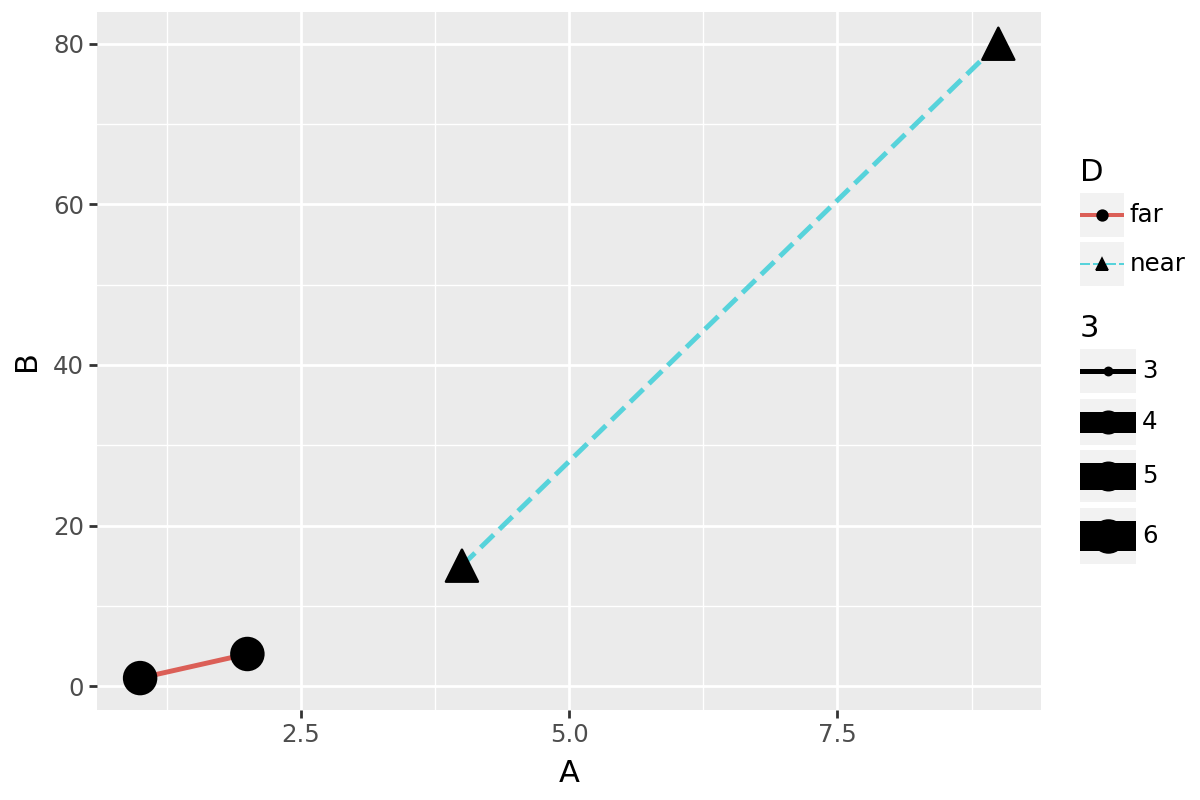

In [90]:
from plotnine import ggplot, geom_line, geom_point, aes

(ggplot(data = toy_data)
 + geom_line(aes(x = 'A', 
                 y = 'B',
                 color = 'D',
                 shape = 'D',
                 linetype = 'D',
                 size = 3))
 + geom_point(aes(x = 'A', 
                  y = 'B', 
                  shape = 'D',
                  size = 6))
)

## Topic 4.2 - Faceting in `ggplot`

To facet a visualization, we use one of the following at the end of the `ggplot` code.
1. `+ facet_grid(rows = "col_name"))` to facet Y,
2. `+ facet_grid(cols = "col_name")` to facet X,
3. `+ facet_grid(cols = "col1", rows = "col2")` to facet both X and Y,

#### Load example data

In [139]:
births = pl.read_csv('https://github.com/yardsale8/DSCI_210_R_notebooks/raw/main/data/NC_Birth.csv', null_values=['.'])

births.head()

shape: (5, 23)
┌──────────┬────────┬─────────────────┬──────────┬───┬─────────┬───────┬─────────────────┬─────────┐
│ Father   ┆ Father ┆ Father Years of ┆ Mother   ┆ … ┆ Birth   ┆ Low   ┆ Apgar Score -   ┆ Apgar   │
│ Minority ┆ Age    ┆ Education       ┆ Minority ┆   ┆ Weight  ┆ Birth ┆ One Minute      ┆ Score - │
│ ---      ┆ ---    ┆ ---             ┆ ---      ┆   ┆ (Grams) ┆ ---   ┆ ---             ┆ Five    │
│ str      ┆ i64    ┆ i64             ┆ str      ┆   ┆ ---     ┆ str   ┆ i64             ┆ Minutes │
│          ┆        ┆                 ┆          ┆   ┆ i64     ┆       ┆                 ┆ ---     │
│          ┆        ┆                 ┆          ┆   ┆         ┆       ┆                 ┆ i64     │
╞══════════╪════════╪═════════════════╪══════════╪═══╪═════════╪═══════╪═════════════════╪═════════╡
│ Nonwhite ┆ 50     ┆ 12              ┆ White    ┆ … ┆ 2866    ┆ N     ┆ 9               ┆ 9       │
│ White    ┆ 19     ┆ 9               ┆ White    ┆ … ┆ 3121    ┆ N     ┆ 8               ┆ 9       │
│ White    ┆ 37     ┆ 17              ┆ White    ┆ … ┆ 2667    ┆ N     ┆ 8               ┆ 9       │
│ null     ┆ null   ┆ null            ┆ Nonwhite ┆ … ┆ 2696    ┆ N     ┆ 8               ┆ 9       │
│ Nonwhite ┆ 39     ┆ 11              ┆ Nonwhite ┆ … ┆ 2979    ┆ N     ┆ 4               ┆ 9       │
└──────────┴────────┴─────────────────┴──────────┴───┴─────────┴───────┴─────────────────┴─────────┘

#### Example 1 - Facet Y by `Mother Smoker`
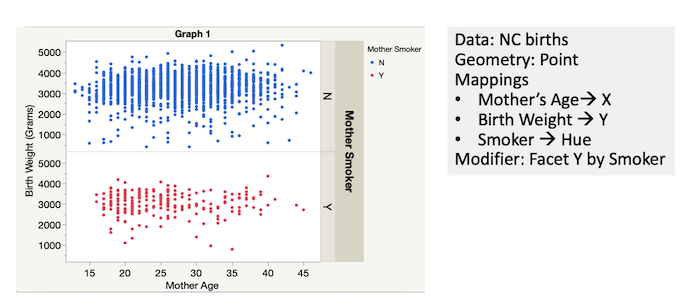

#### Original attempt

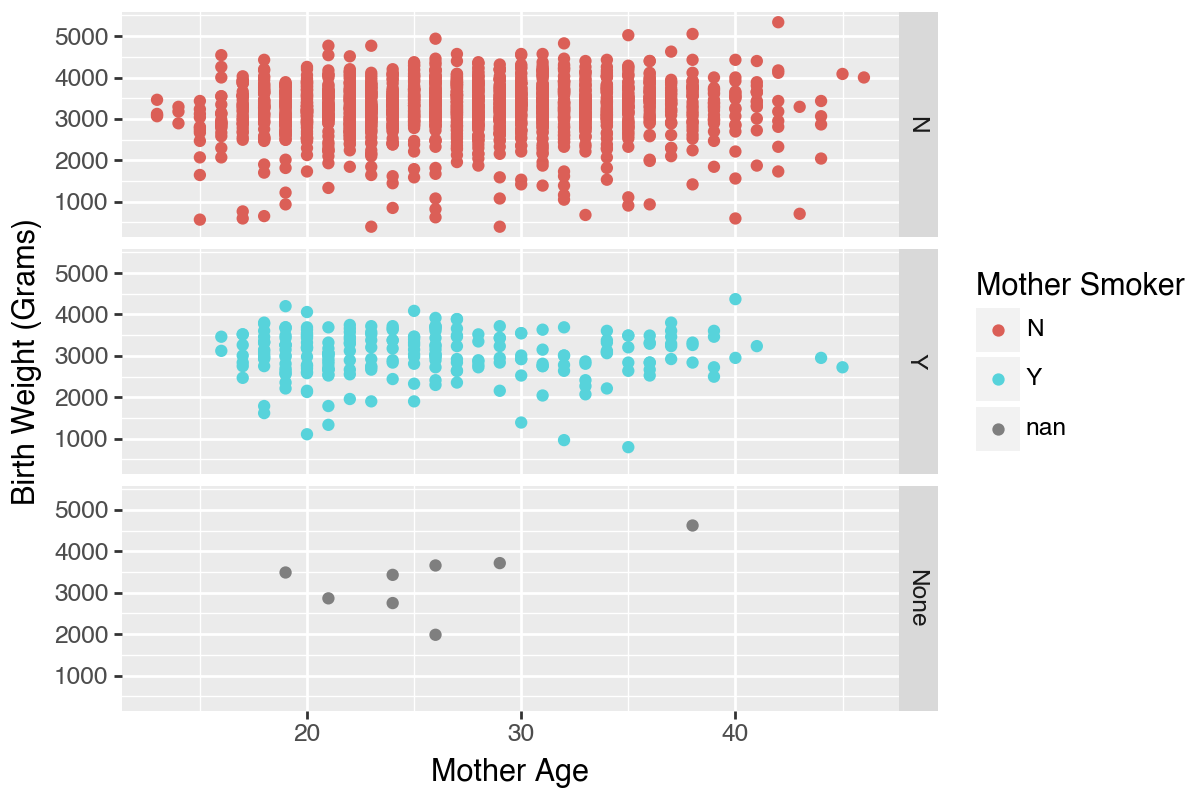

In [195]:
from plotnine import ggplot, geom_point, aes, facet_grid

(ggplot(births)
 + geom_point(aes(x = "Mother Age",
                  y = "Birth Weight (Grams)",
                  color = "Mother Smoker")
             )
 + facet_grid(rows = "Mother Smoker")
 )


Well, those missing values certainly are annoying!

## <font color="red"> Exercise 2.1.4 </font>

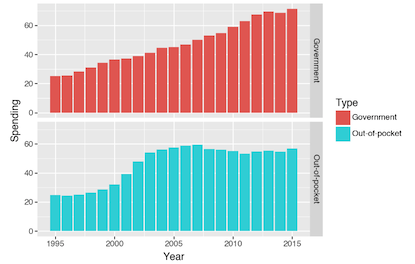

**Task.** Use `plotnine` to implement the visualization shown above.

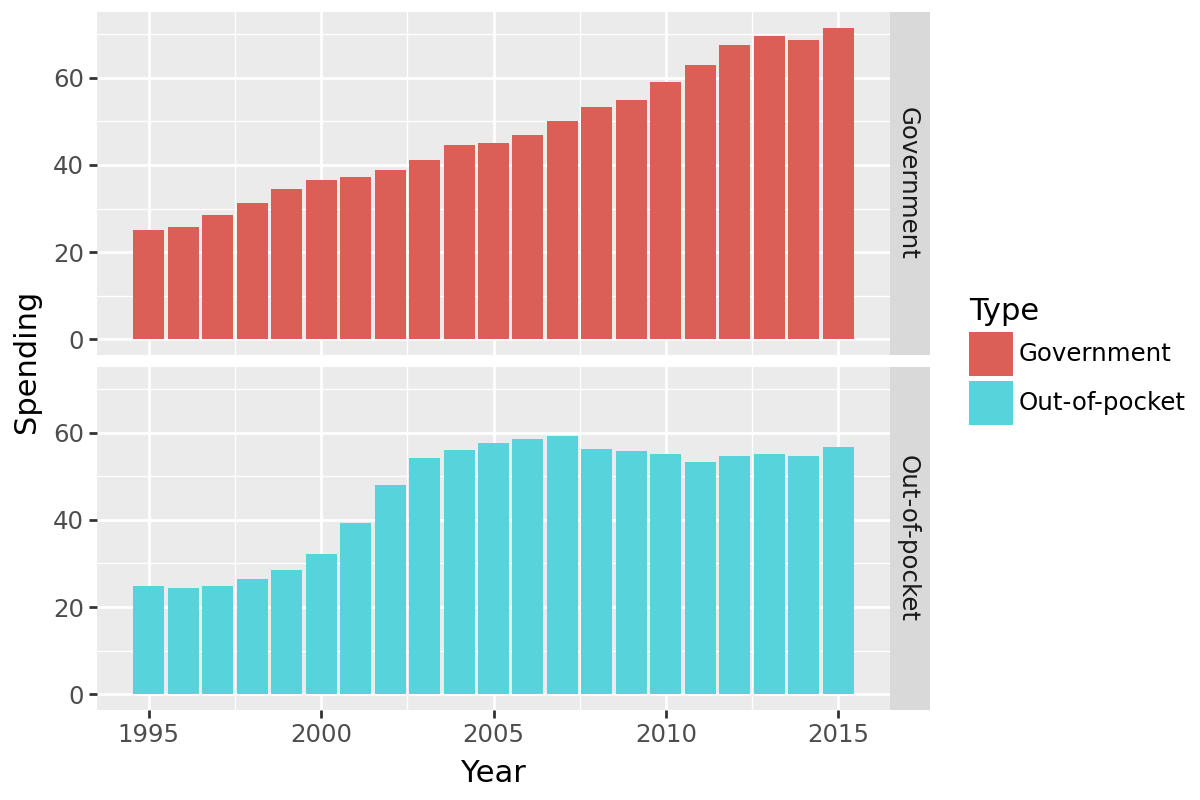

In [102]:
from plotnine import ggplot, geom_bar, aes, facet_grid

(ggplot(mexico_hc_spending)
 + geom_bar(aes(x = 'Year',
                y = 'Spending',
                fill = 'Type'),
                stat = 'identity',
             )
 + facet_grid(rows = "Type")
 )

### Topic 4.3 - Preprocessing data

The last example illustrated the need to preprocess the data as part of a data visualization.  In fact, [Leland Wilkinson](https://en.wikipedia.org/wiki/Leland_Wilkinson)--creator of the [Grammar of Graphics](https://www.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448/)--considered data processing tools a vital part of a graphics library.



#### Common reasons to preprocess the data

Creating a meaningful visualization often requires some preprocessing of the data:
1. Adding a local data filter,
2. Cleaning up some text columns,
3. Performing a custom aggregation (e.g., computing a per-capita rate), or
4. Reshaping the table [Coming soon!]

#### Example - Removing missing `Mother.Smoker` by adding a `filter`

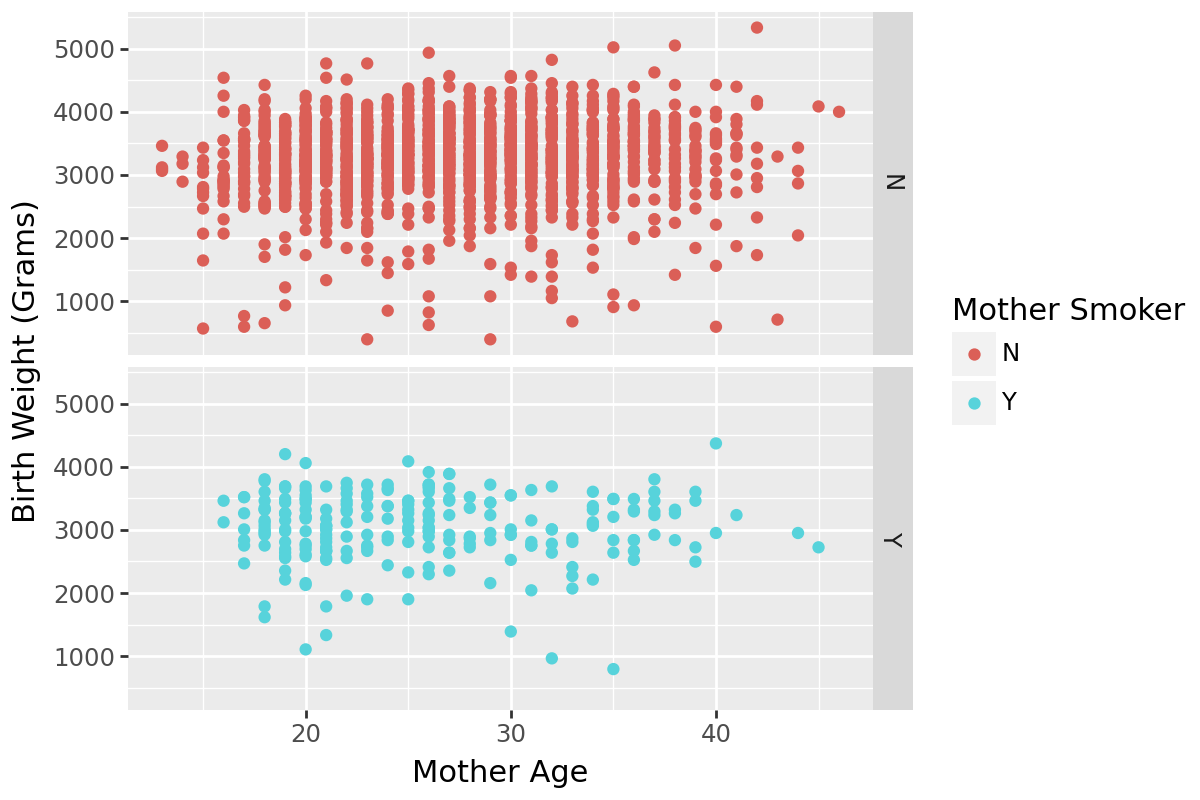

In [107]:
from plotnine import geom_point, aes, facet_grid

(ggplot(births                                    # When preprocessing, start with the data
        .filter(pl.col("Mother Smoker") != '')    # Preprocessing steps go here
       ) 
 + geom_point(aes(x = "Mother Age",
                  y = "Birth Weight (Grams)",
                  color = "Mother Smoker")
             )
 + facet_grid(rows = "Mother Smoker")
 )

## <font color="red"> Exercise 2.1.4 </font>

Create a visualization with the following specifiction.

**Data.** NC Births

**Preprocessing.** Convert the birth weights to pounds.

**Geometry.** Point

**Mappings.**

* Gestational Age $\longrightarrow$ X
* Birth Weight in lb. $\longrightarrow$ Y
* Mother Smoker $\longrightarrow$ Shape
* Mother Education $\longrightarrow$ Color

**Modifiers.**

* Facet X by Mother Smoker
* Filter out any missing/empty labels.

Do all of this in a single chain.

In [125]:
from plotnine import geom_point, aes, facet_grid

births = births.with_columns(
    (pl.col('Birth Weight (Grams)') / 453.6).alias('Birth Weight (lbs)')
)

(ggplot(births                                    
        .filter(pl.col("Mother Smoker") != '')    
       ) 
 + geom_point(aes(x = "Gestational Age",
                  y = "Birth Weight (lbs)",
                  shape = "Mother Smoker",
                  color = 'Mother Years of Education'),
             )
 + facet_grid(rows = "Mother Smoker")
 )

PlotnineError: "Could not evaluate the 'x' mapping: 'Gestational Age' (original error: invalid syntax (<string-expression>, line 1))"

C:\Users\gt7194iu\AppData\Local\anaconda3\envs\polars\Lib\site-packages\IPython\lib\pretty.py:787: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


PlotnineError: "Could not evaluate the 'x' mapping: 'Gestational Age' (original error: invalid syntax (<string-expression>, line 1))"

## Topic 4.4 - Plotting an aggregation

Recall that we often want to plot an aggregated value to clean/clarify the visualization

### Bar graphs: The most basic aggregation

The most common aggregation is assigning the row count to the Y axis in a bar graph.  This can be accomplished using `stat='count'` in `geom_bar`

#### Example 1 - Counts for `Mother Smoker`

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_count : Removed 8 rows containing non-finite values.


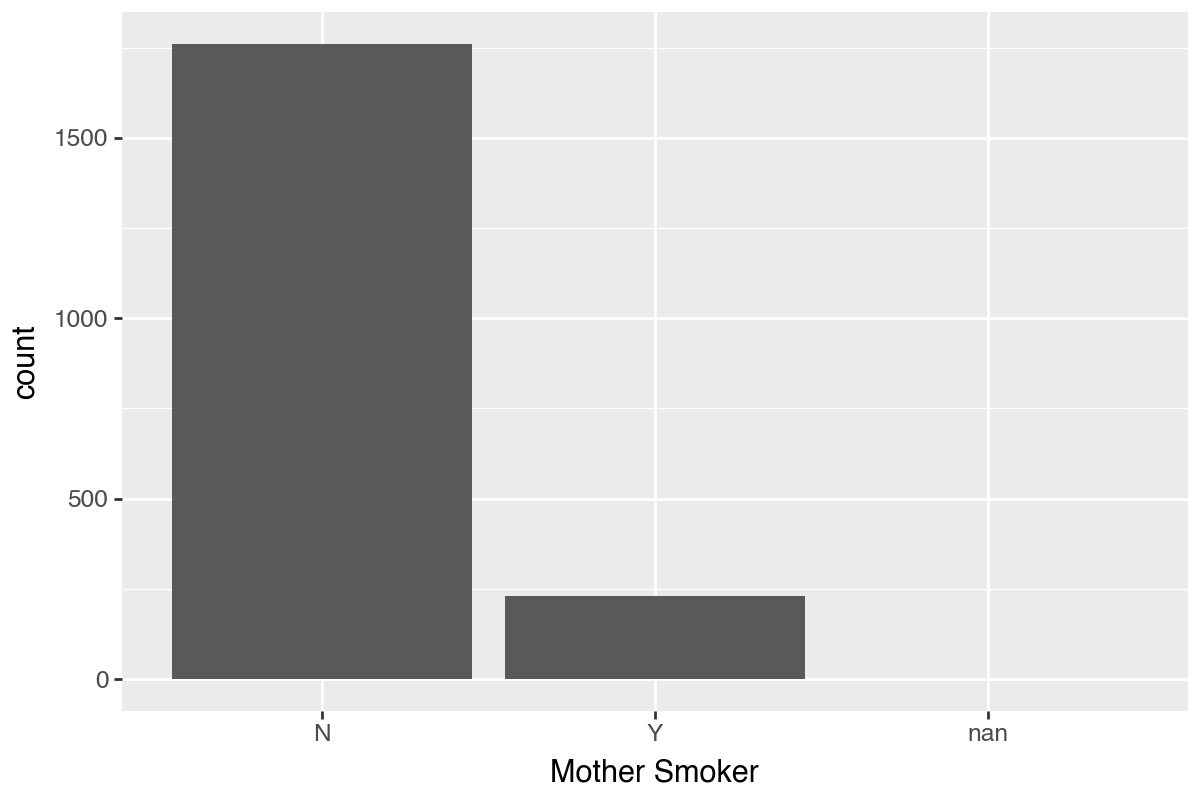

In [198]:
from plotnine import ggplot, geom_bar, aes

(ggplot(births)
  + geom_bar(aes(x = "Mother Smoker"),
             stat = 'count'
            )
   )

#### Example 2 - Counting combinations of `Low.Birth` and `Gender`

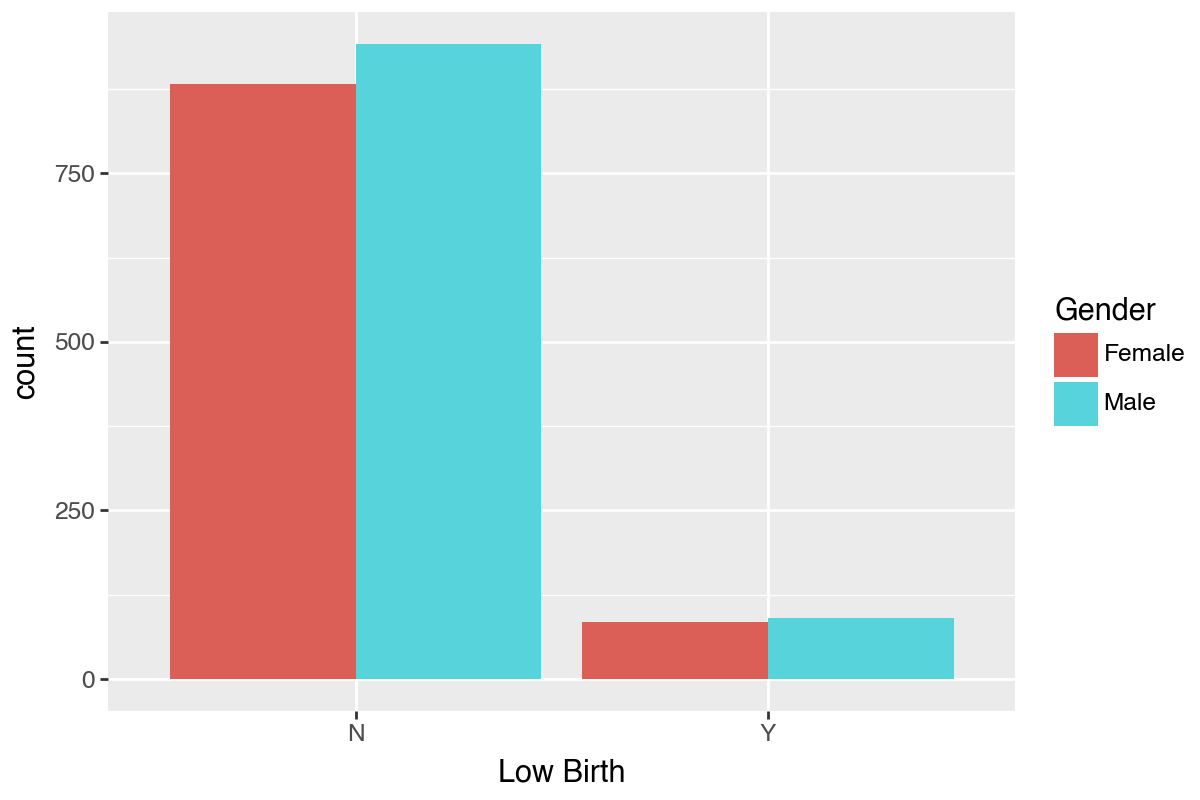

In [200]:
(ggplot(births)
  + geom_bar(aes(x = "Low Birth",
                 fill = "Gender"),
             stat = 'count',
             position = 'dodge'
            )
   )

### Aggregating numeric fields

Next, we will look at plotting aggregated numeric fields.

### Bad Plots

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1029 rows containing missing values.


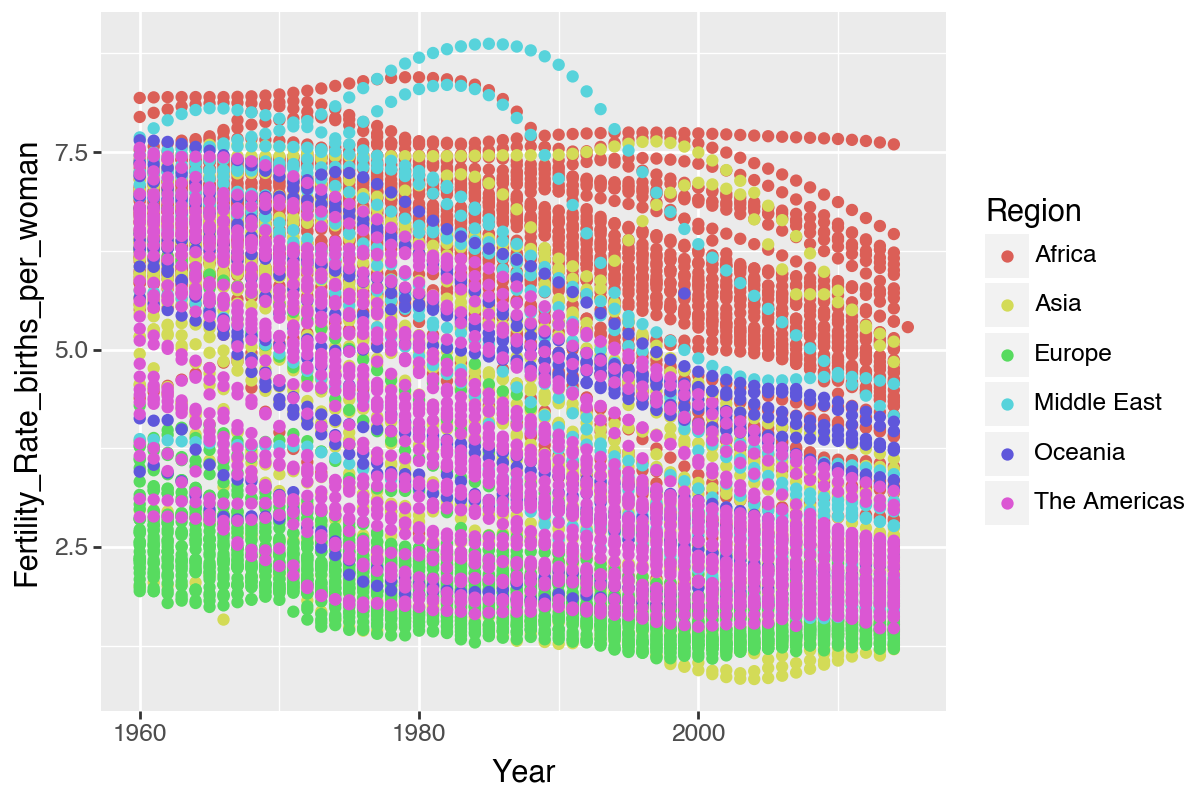

In [201]:
# Bad plot 1
(ggplot(world_bank)
  + geom_point(aes(x = "Year",
                   y = "Fertility_Rate_births_per_woman",
                   color = "Region")
              )
)

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 45 rows containing missing values.


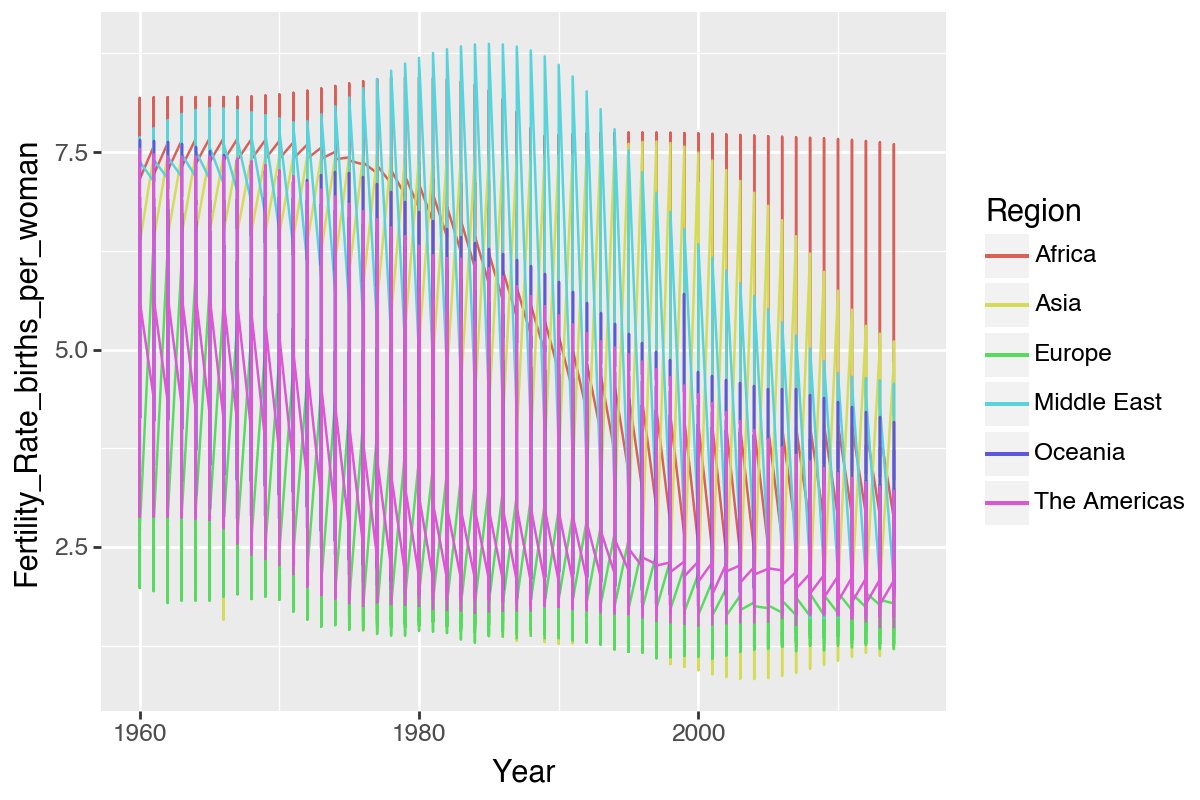

In [202]:
# Bad plot 2
(ggplot(world_bank)
  + geom_line(aes(x = "Year",
                   y = "Fertility_Rate_births_per_woman",
                   color = "Region")
              )
)

### Manually aggregation

1. Use `group_by` and `agg` to perform each aggregation (e.g., the things you want as *Measures* in Tableau), while
2. Group by all the other fields included in the plot.

#### Better Graphs with Aggregation

To clean up the previous plots, we want to
1.   Plot the *average* fertility $\longrightarrow$ compute with `agg`, while
2.   Plotting year (X) and Region (Color) $\longrightarrow$ group by these.

Finally, we need to make sure we use the name of the new aggregated field in a `ggplot aes` specification.


/opt/anaconda3/envs/polars/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 5 rows containing missing values.


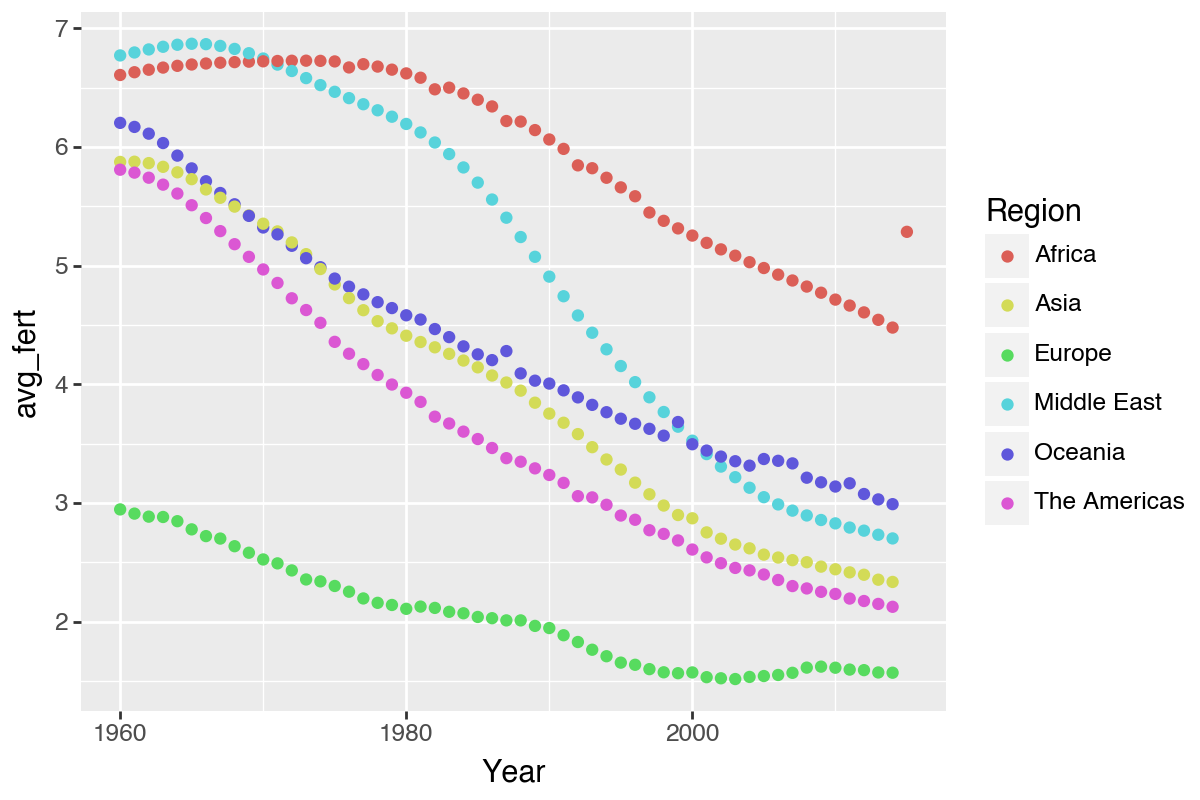

In [204]:
(ggplot(world_bank
        .group_by("Year", "Region")
        .agg(avg_fert = pl.col("Fertility_Rate_births_per_woman").mean())
        )
  + aes(x = "Year",
        y = "avg_fert",
        color = "Region")
  + geom_point()
)

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


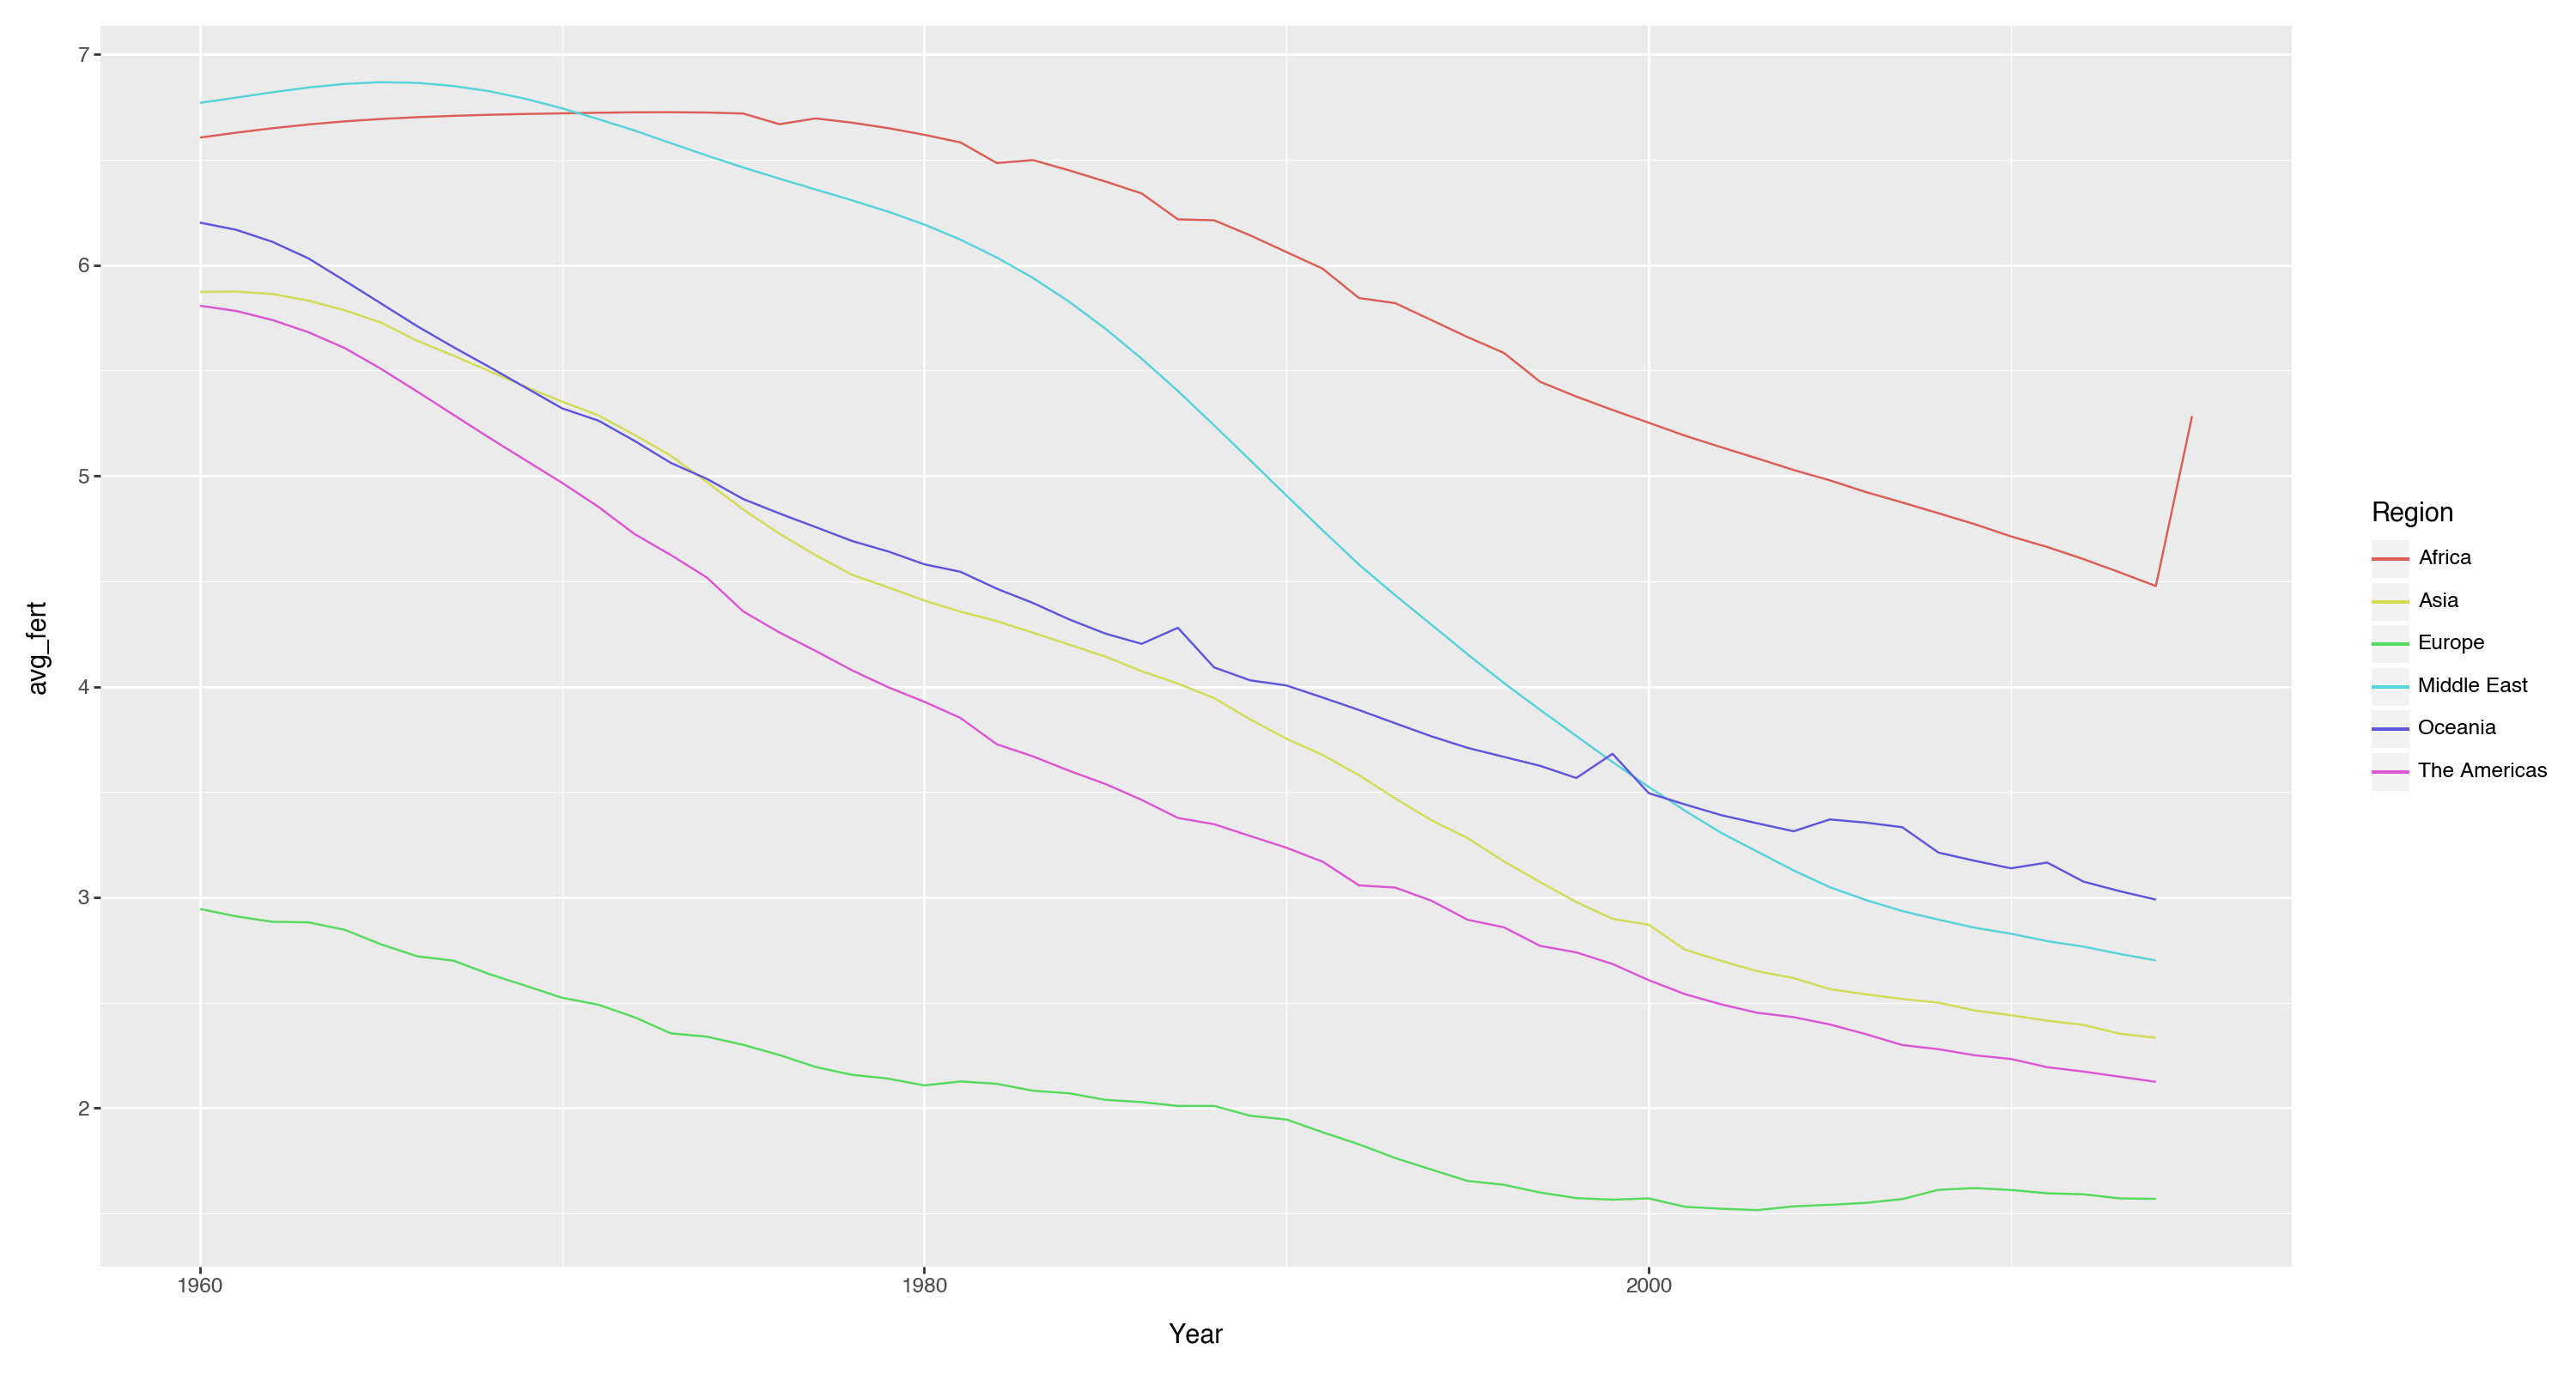

In [160]:
(ggplot(world_bank
        .group_by("Year", "Region")
        .agg(avg_fert = pl.col("Fertility_Rate_births_per_woman").mean())
        )
  + aes(x = "Year",
        y = "avg_fert",
        color = "Region")
  + geom_line()
)

#### Letting `ggplot` and `stat_summary` do the work

Since plotting an aggregated field can be annoying, `ggplot` provides `stat_summary` to perform both aggregation and mapping in one function.

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_summary : Removed 1029 rows containing non-finite values.


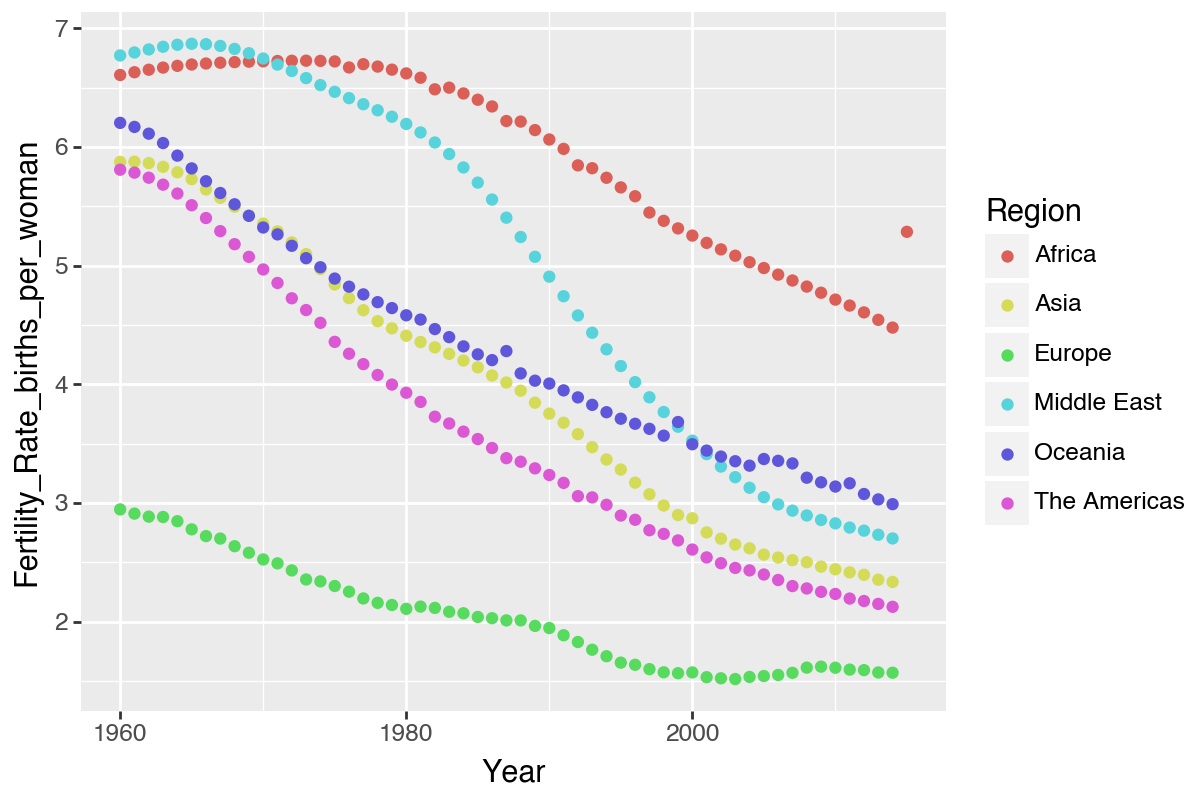

In [205]:
from plotnine import ggplot, aes, stat_summary
import numpy as np # for the mean, median, etc.

(ggplot(data = world_bank)
  + aes(x = "Year",
        y = "Fertility_Rate_births_per_woman",
        color = "Region")
  + stat_summary(geom = 'point', fun_y = np.mean)
)

/opt/anaconda3/envs/polars/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_summary : Removed 1029 rows containing non-finite values.


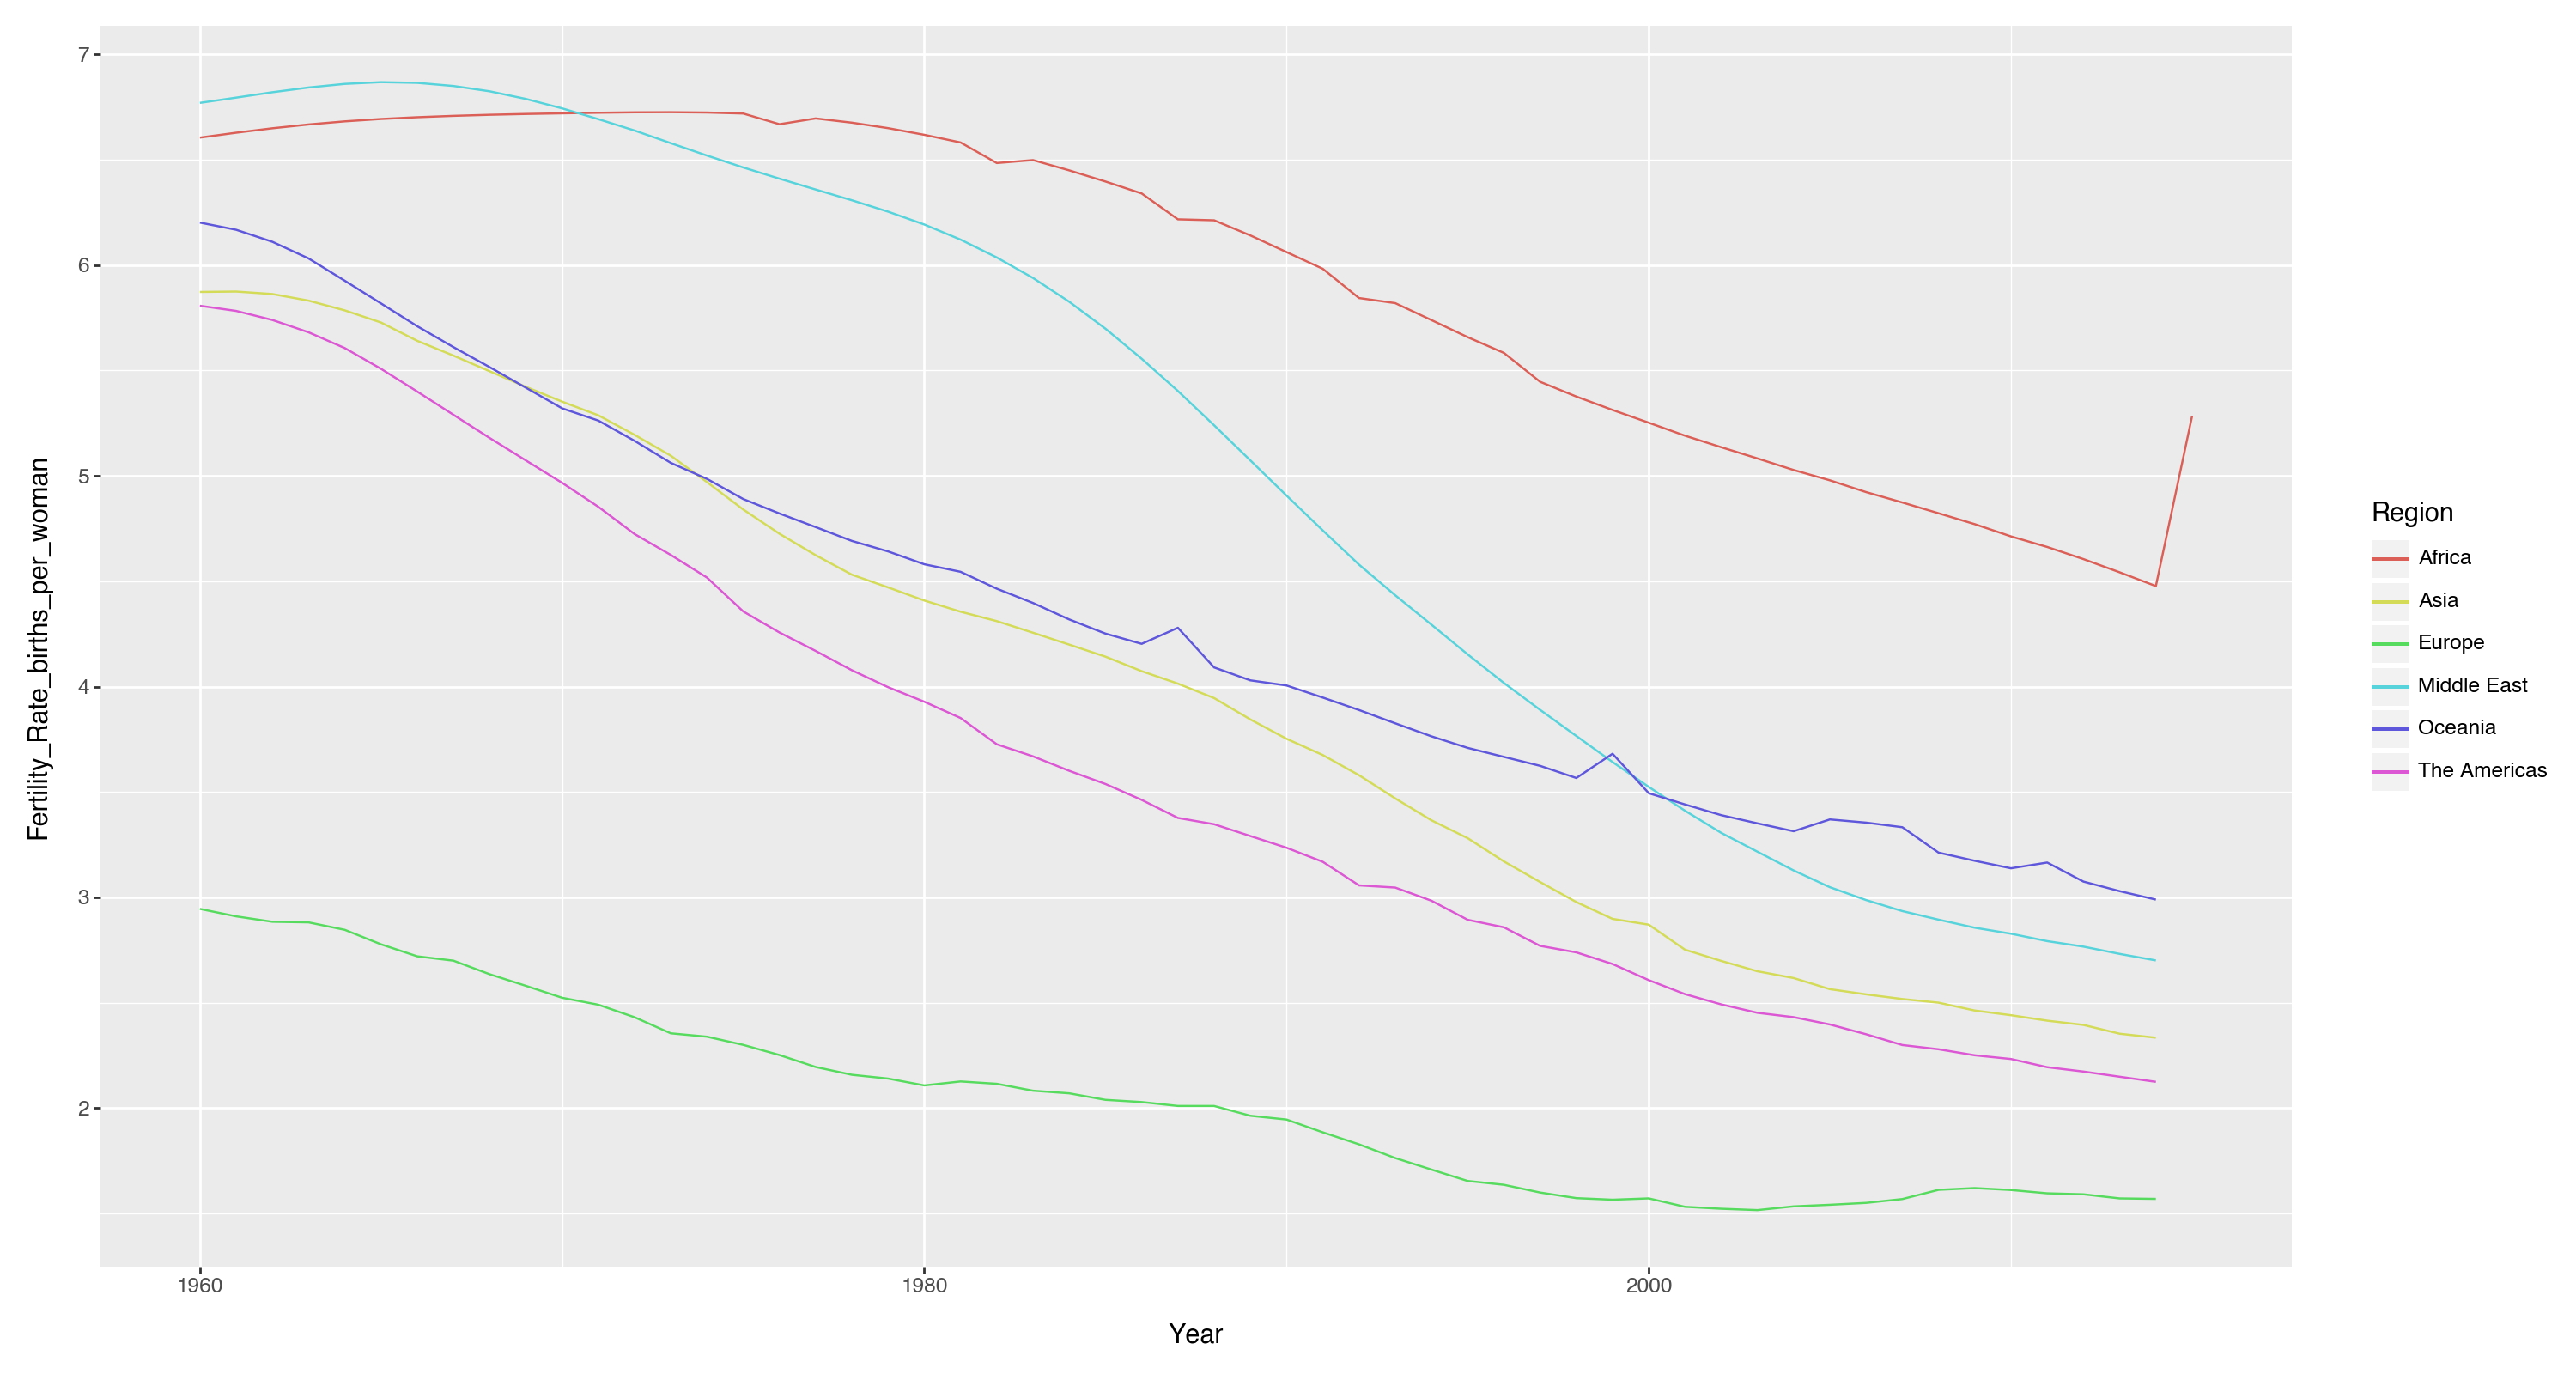

In [162]:
from plotnine import ggplot, aes, stat_summary
import numpy as np # for the mean, median, etc.

(ggplot(data = world_bank)
  + aes(x = "Year",
        y = "Fertility_Rate_births_per_woman",
        color = "Region")
  + stat_summary(geom = 'line', fun_y = np.mean)
)


## <font color="red"> Exercise 2.1.5 </font>

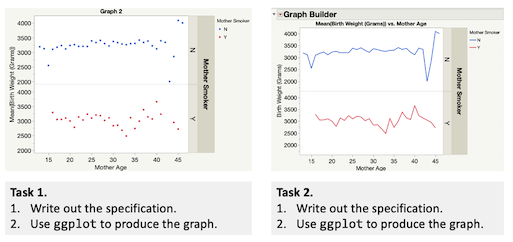

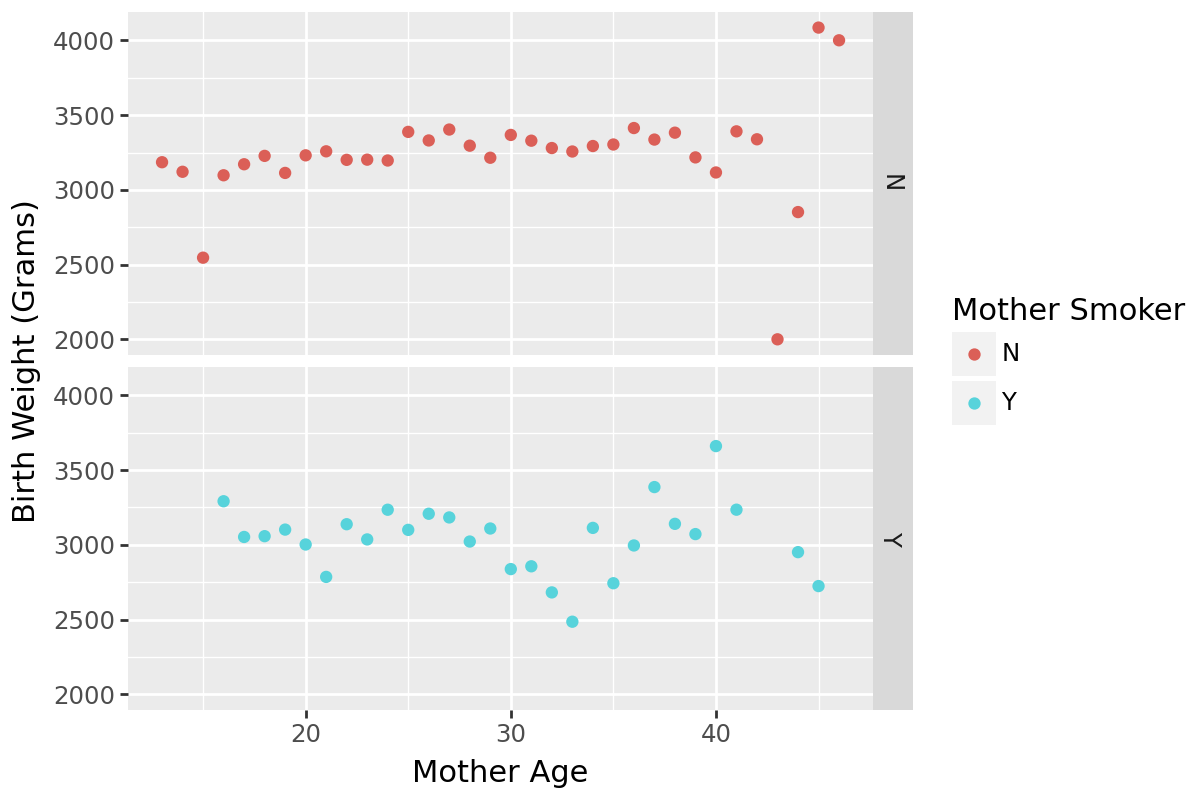

In [130]:
from plotnine import ggplot, geom_point, facet_grid, aes, stat_summary
import numpy as np

(ggplot(births
        .filter(pl.col('Mother Smoker') != '')
       )
       + aes(x = 'Mother Age',
                        y = 'Birth Weight (Grams)',
                        color = 'Mother Smoker')
              + stat_summary(geom = 'point', fun_y = np.mean)
 
       + facet_grid(rows = 'Mother Smoker')
)

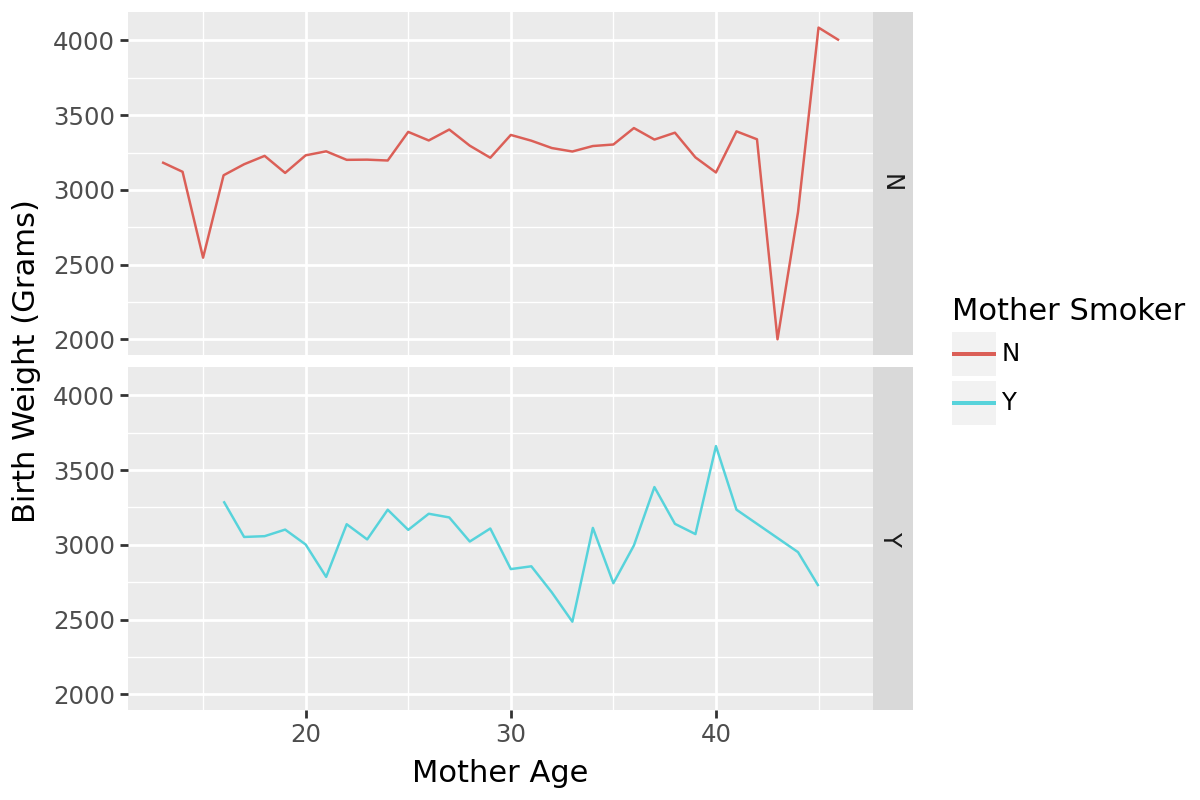

In [131]:
from plotnine import ggplot, geom_point, facet_grid, aes, stat_summary
import numpy as np

(ggplot(births
        .filter(pl.col('Mother Smoker') != '')
       )
       + aes(x = 'Mother Age',
                        y = 'Birth Weight (Grams)',
                        color = 'Mother Smoker')
              + stat_summary(geom = 'line', fun_y = np.mean)
 
       + facet_grid(rows = 'Mother Smoker')
)

## Topic 4.4 - Creating small multiples with `facet_wrap`

When you want to visualize difference between a large number of categories, use [small multiples](https://en.wikipedia.org/wiki/Small_multiple#:~:text=A%20small%20multiple%20(sometimes%20called,was%20popularized%20by%20Edward%20Tufte.) using `facet_wrap`.

**Loading the World Bank data**

In [132]:
world_bank = pl.read_csv('https://github.com/yardsale8/DSCI_210_R_notebooks/raw/main/data/World_Bank_Clean.csv',
                         infer_schema_length=10000)

world_bank.head()

shape: (5, 10)
┌────────┬─────────┬─────────────┬──────┬───┬─────────────┬─────────────┬─────────────┬────────────┐
│ Region ┆ Country ┆ Scandinavia ┆ Year ┆ … ┆ GDP_per_cap ┆ Internet_pe ┆ Life_exp_bi ┆ Total_Popu │
│ ---    ┆ ---     ┆ ---         ┆ ---  ┆   ┆ ita         ┆ r_100       ┆ rth         ┆ lation     │
│ str    ┆ str     ┆ str         ┆ i64  ┆   ┆ ---         ┆ ---         ┆ ---         ┆ ---        │
│        ┆         ┆             ┆      ┆   ┆ f64         ┆ f64         ┆ f64         ┆ f64        │
╞════════╪═════════╪═════════════╪══════╪═══╪═════════════╪═════════════╪═════════════╪════════════╡
│ Africa ┆ Algeria ┆ No          ┆ 1960 ┆ … ┆ 2466.798296 ┆ null        ┆ 46.135122   ┆ 1.1124892e │
│        ┆         ┆             ┆      ┆   ┆             ┆             ┆             ┆ 7          │
│ Africa ┆ Algeria ┆ No          ┆ 1961 ┆ … ┆ 2078.863209 ┆ null        ┆ 46.590317   ┆ 1.1404859e │
│        ┆         ┆             ┆      ┆   ┆             ┆             ┆             ┆ 7          │
│ Africa ┆ Algeria ┆ No          ┆ 1962 ┆ … ┆ 1628.891336 ┆ null        ┆ 47.045      ┆ 1.1690152e │
│        ┆         ┆             ┆      ┆   ┆             ┆             ┆             ┆ 7          │
│ Africa ┆ Algeria ┆ No          ┆ 1963 ┆ … ┆ 2133.977953 ┆ null        ┆ 47.496195   ┆ 1.198513e7 │
│ Africa ┆ Algeria ┆ No          ┆ 1964 ┆ … ┆ 2201.492443 ┆ null        ┆ 47.941902   ┆ 1.2295973e │
│        ┆         ┆             ┆      ┆   ┆             ┆             ┆             ┆ 7          │
└────────┴─────────┴─────────────┴──────┴───┴─────────────┴─────────────┴─────────────┴────────────┘

#### Example - Fertility over time by country - No `facet_wrap`

#### Step 1 - Make sure we get the correct fields and labels.

In [133]:
# Inspect column names
world_bank.columns

['Region',
 'Country',
 'Scandinavia',
 'Year',
 'CO2_metric_tons_per_capita',
 'Fertility_Rate_births_per_woman',
 'GDP_per_capita',
 'Internet_per_100',
 'Life_exp_birth',
 'Total_Population']

In [134]:
# Inspect unique region labels
world_bank['Region'].unique()

shape: (6,)
Series: 'Region' [str]
[
	"Asia"
	"Middle East"
	"Oceania"
	"Africa"
	"The Americas"
	"Europe"
]

C:\Users\gt7194iu\AppData\Local\anaconda3\envs\polars\Lib\site-packages\plotnine\geoms\geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


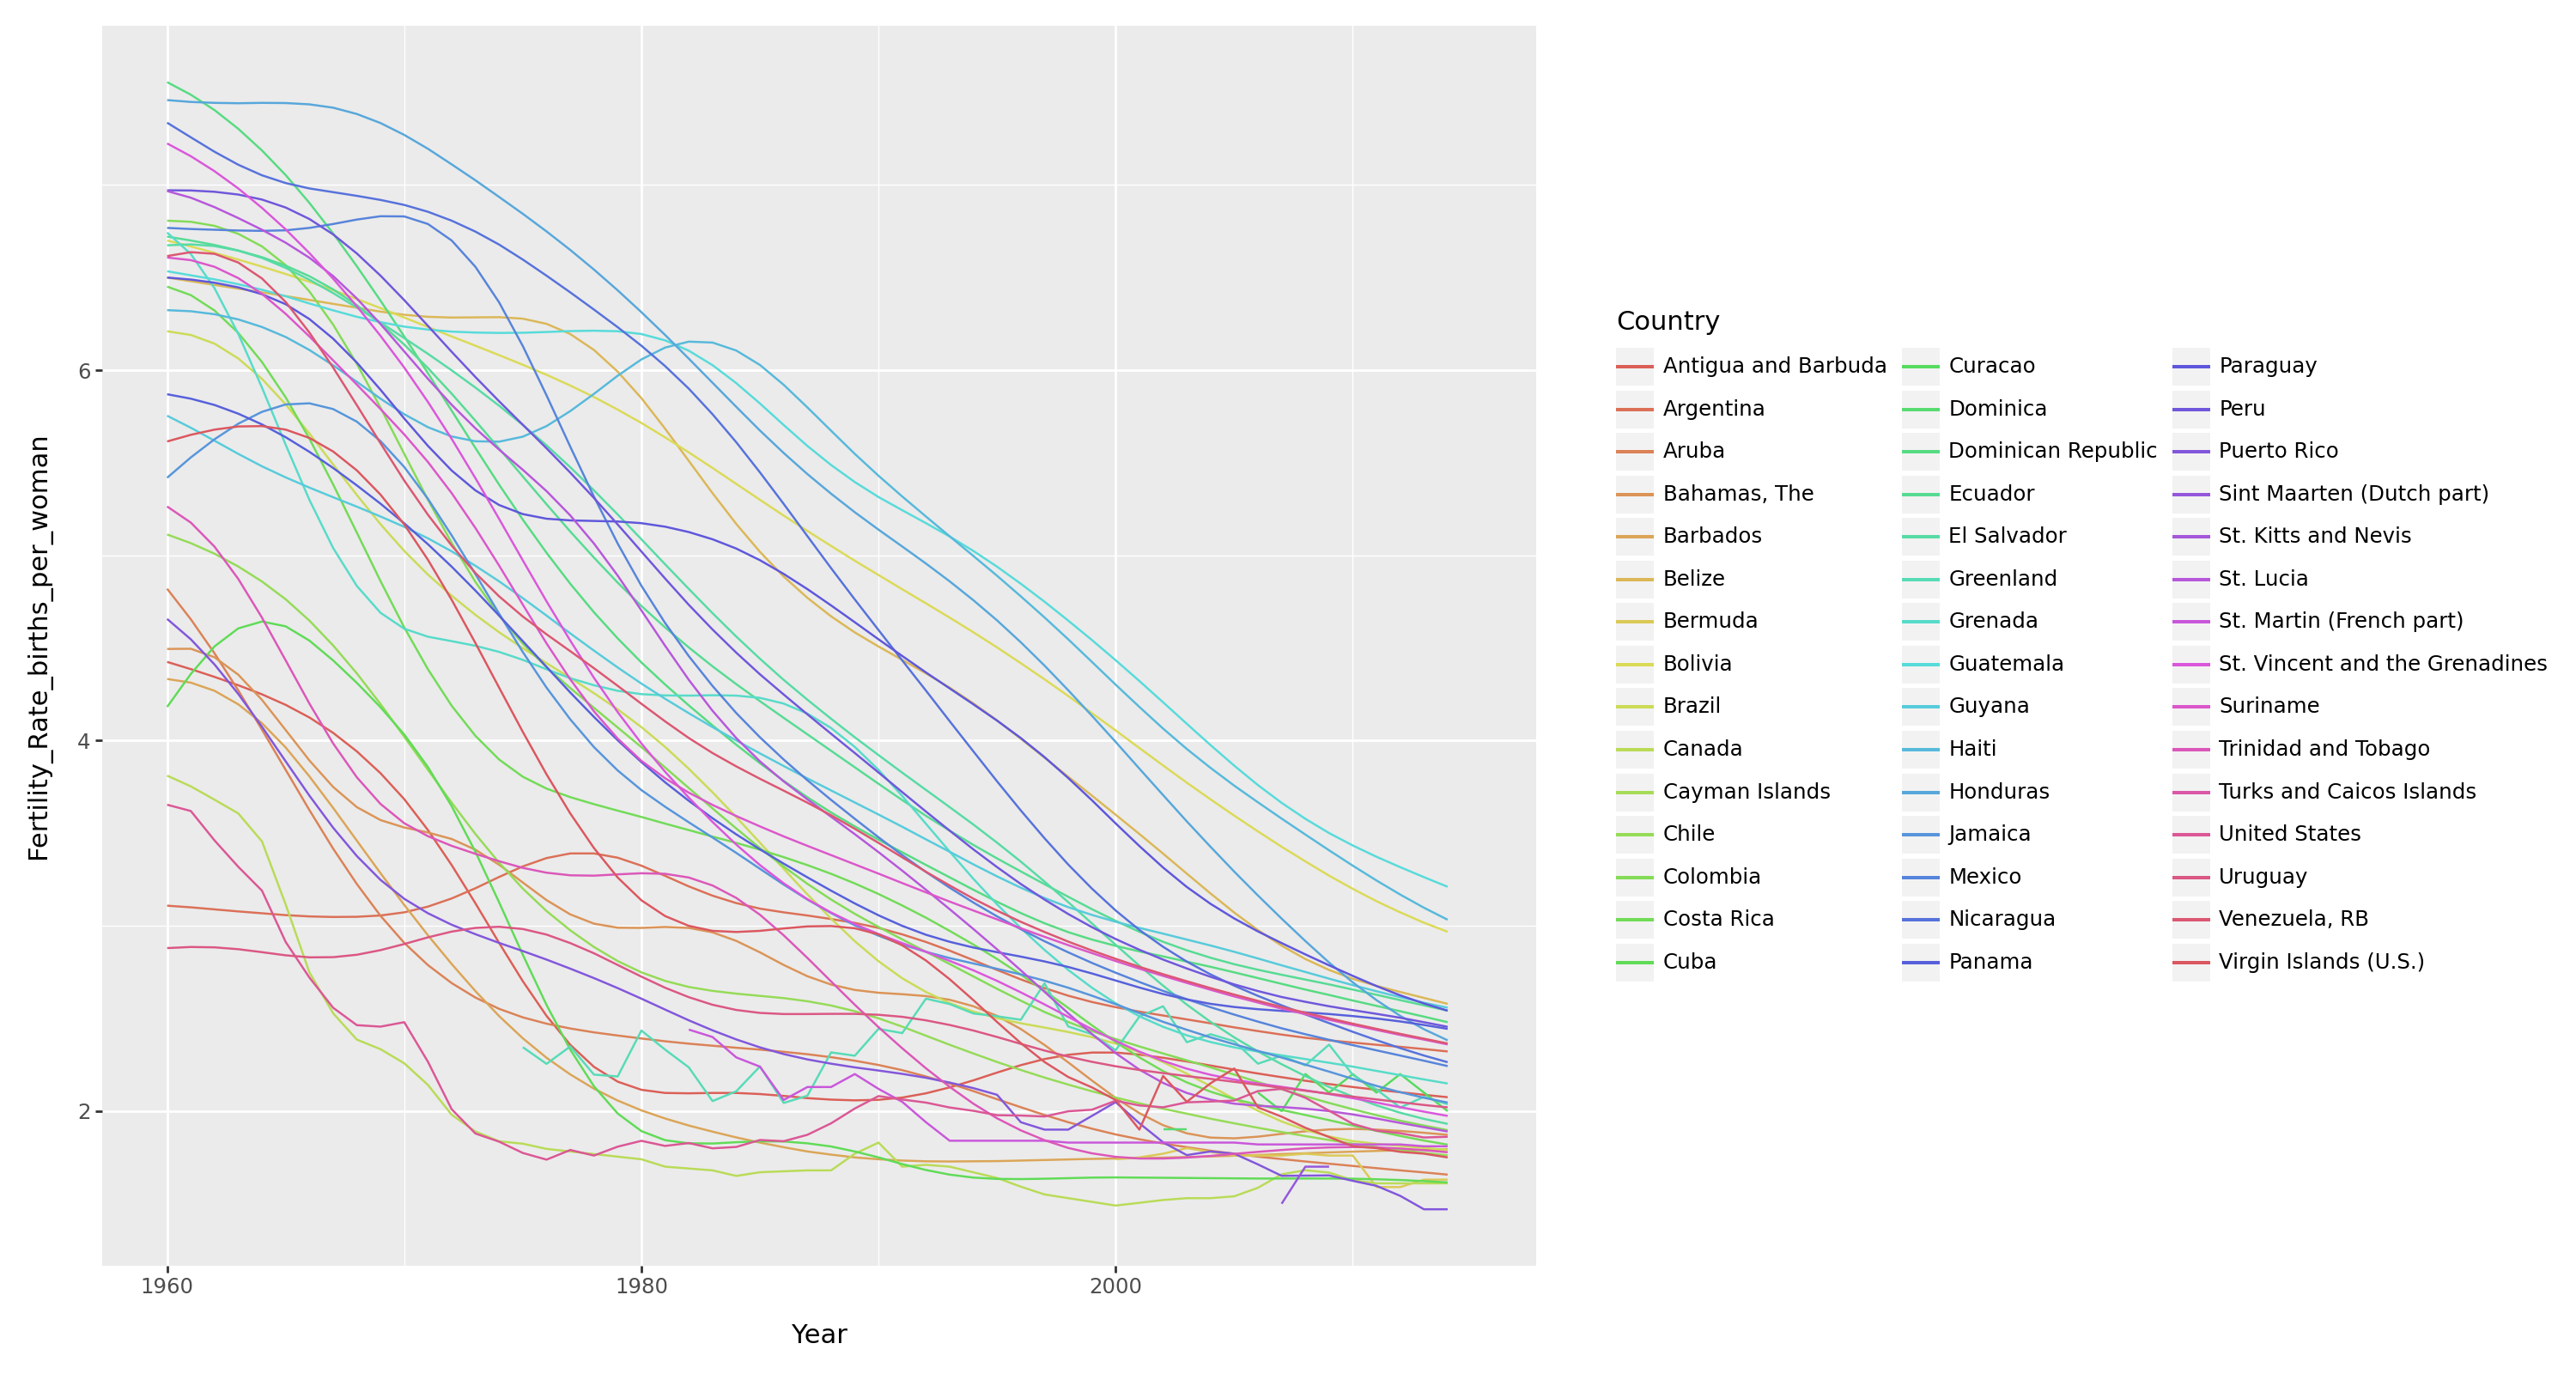

In [135]:
from plotnine import ggplot, geom_line, aes, facet_wrap
#This code expands the default plot size:
pn.options.figure_size = (15, 8)

(ggplot(world_bank
        .filter(pl.col('Region') == 'The Americas')
       )
 + geom_line(aes(x = "Year",
                 y = "Fertility_Rate_births_per_woman",
                 color = "Country"))
# + facet_wrap(~Country)
)

C:\Users\gt7194iu\AppData\Local\anaconda3\envs\polars\Lib\site-packages\plotnine\geoms\geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


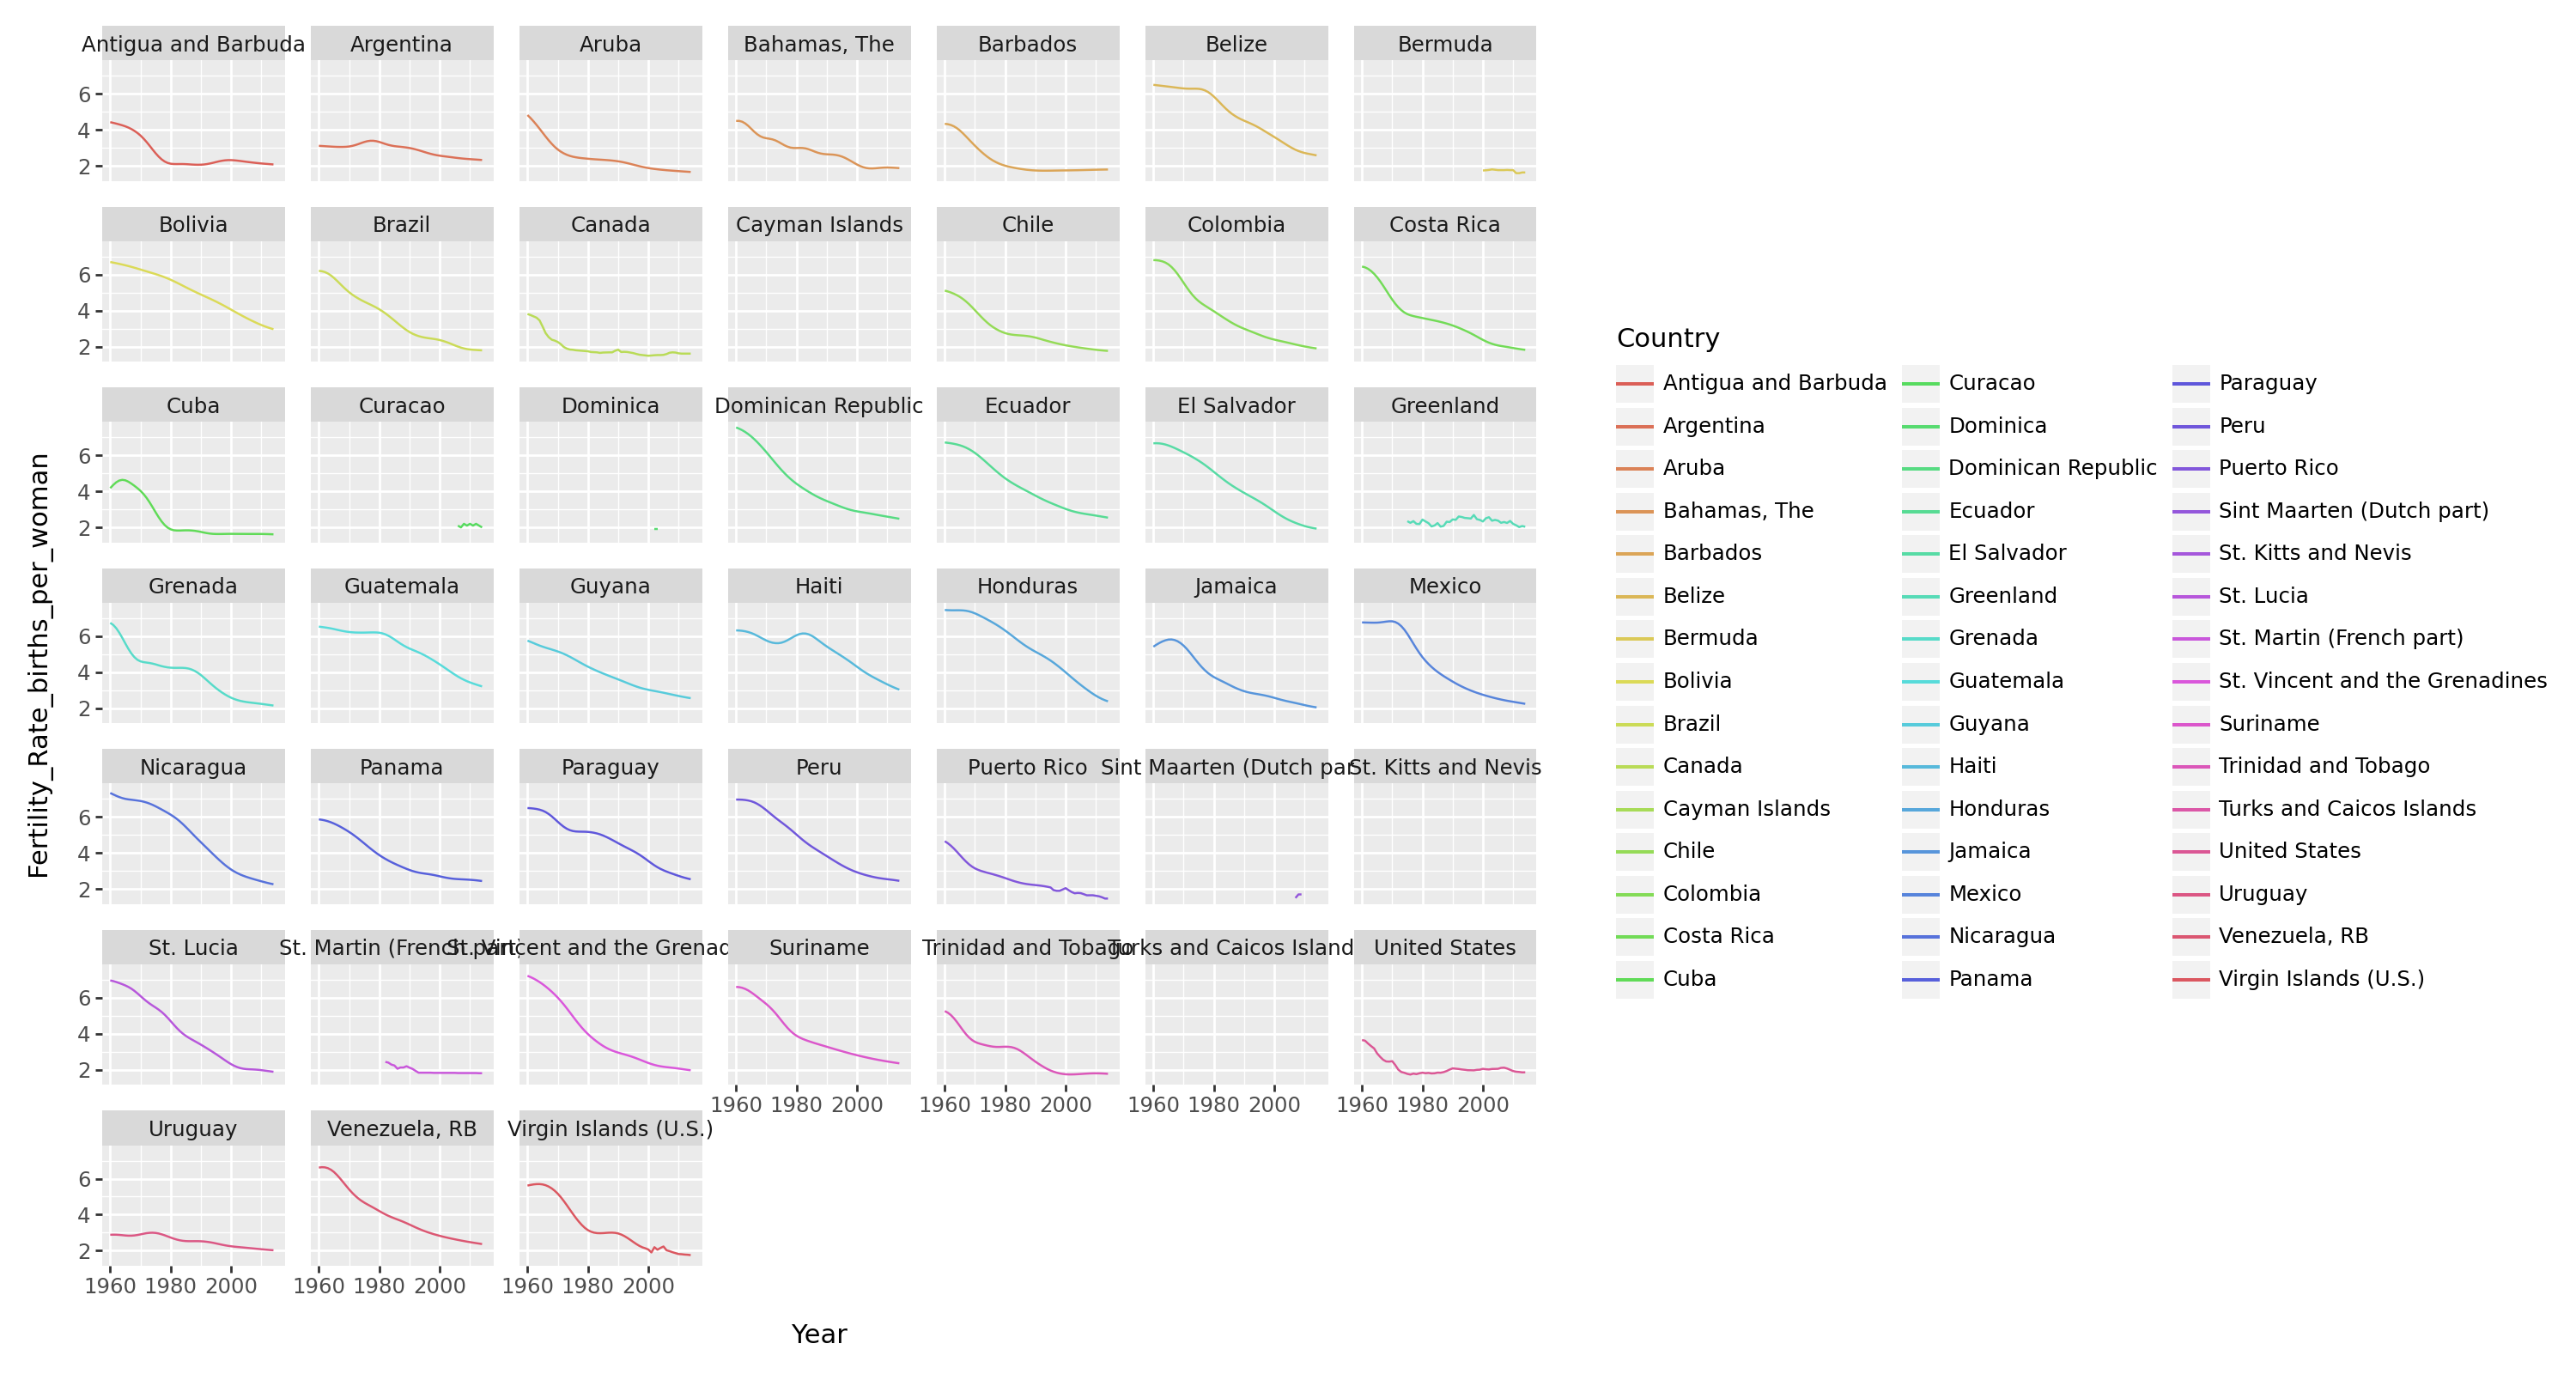

In [136]:
from plotnine import ggplot, geom_line, aes, facet_wrap

#This code expands the default plot size:
pn.options.figure_size = (15, 8)

(ggplot(world_bank
        .filter(pl.col('Region') == 'The Americas')
       )
 + geom_line(aes(x = "Year",
                 y = "Fertility_Rate_births_per_woman",
                 color = "Country"))
+ facet_wrap("~Country")
)

In the previous version, the legend isn't really needed and takes up a lot of space.  Let's remove it.

C:\Users\gt7194iu\AppData\Local\anaconda3\envs\polars\Lib\site-packages\plotnine\geoms\geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


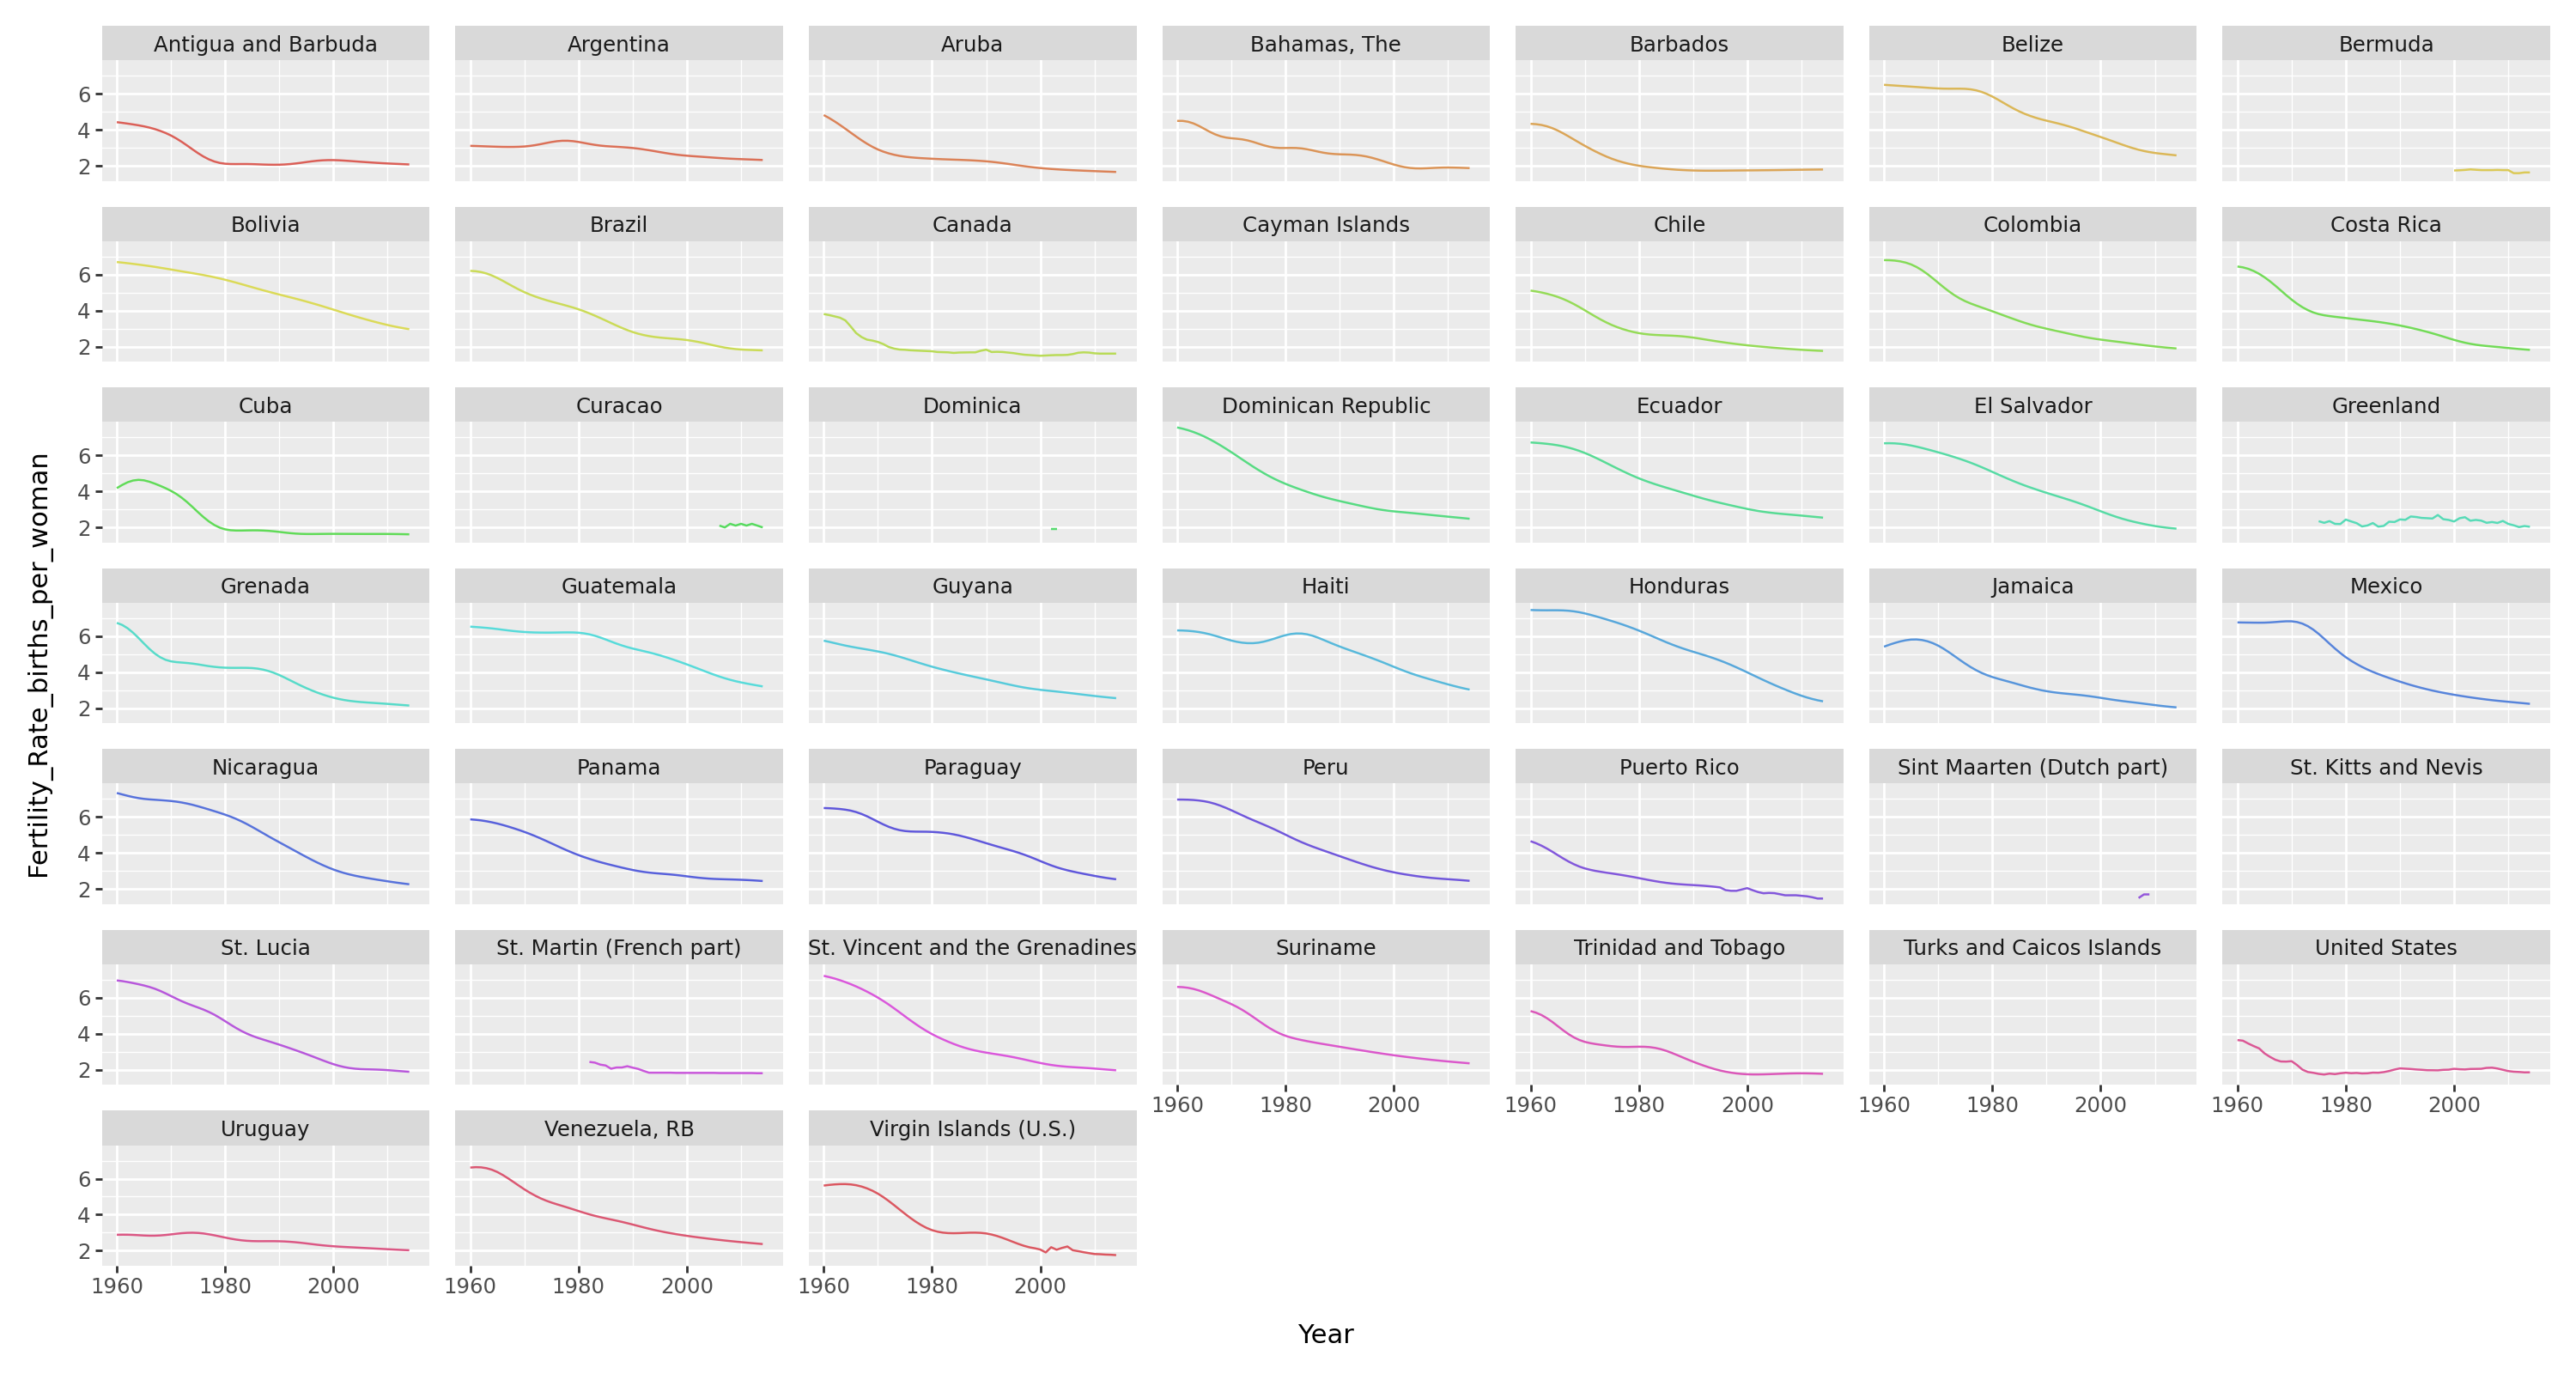

In [137]:
from plotnine import ggplot, geom_line, aes, facet_wrap, scale_color_discrete

#This code expands the default plot size:
pn.options.figure_size = (15, 8)

(ggplot(world_bank
        .filter(pl.col('Region') == 'The Americas')
       )
 + geom_line(aes(x = "Year",
                 y = "Fertility_Rate_births_per_woman",
                 color = "Country"))
+ facet_wrap("~Country")
+ scale_color_discrete(guide = None)
)

## <font color="red"> Exercise 2.1.6 </font>

Create small multiples to visualize the life expectancies (Y) by the year (X) for each country (wrap) in Europe (filter).  Do all of this in one pipe/`+` chain.

C:\Users\gt7194iu\AppData\Local\anaconda3\envs\polars\Lib\site-packages\plotnine\geoms\geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


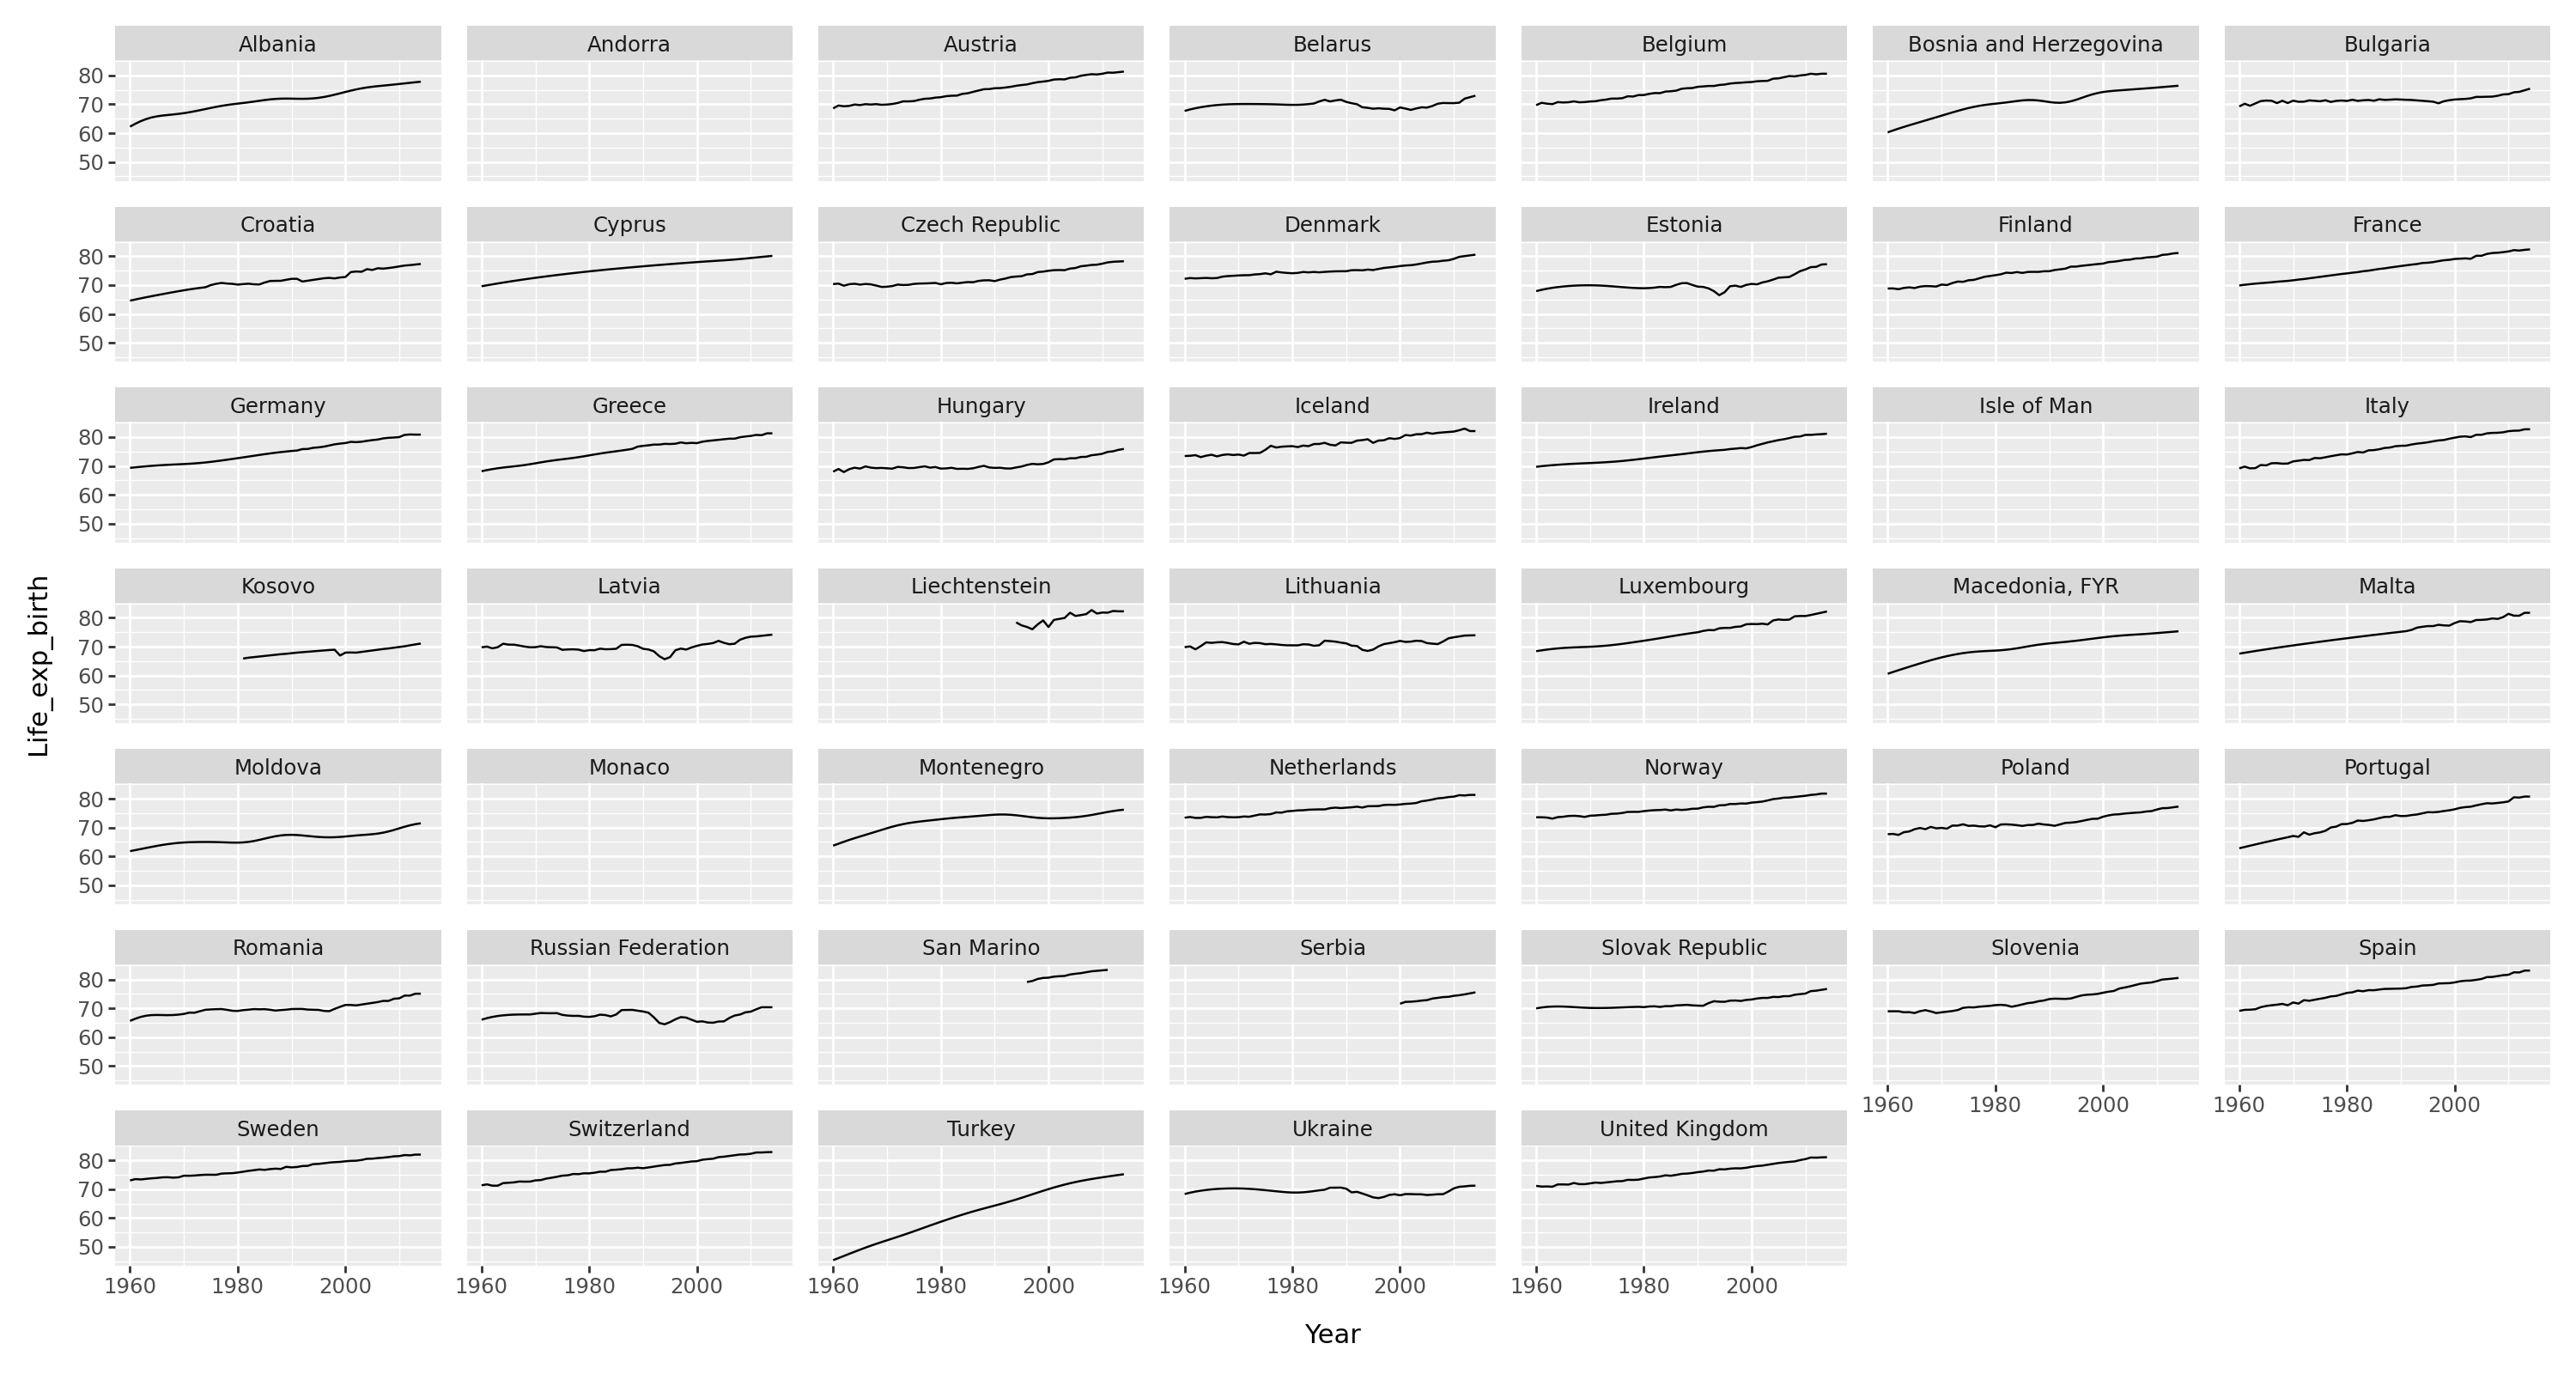

In [138]:
from plotnine import ggplot, geom_line, aes, facet_wrap

pn.options.figure_size = (15, 8)

(ggplot(world_bank
        .filter(pl.col('Region') == 'Europe')
       )
 + geom_line(aes(x = "Year",
                 y = "Life_exp_birth"))
+ facet_wrap("~Country")
)